# US Census data

Identifying characteristics that are
associated with a person making more or less than $50,000 per year;

## Frame the problem  

What's the business objective ?
How does the company expect to use and benefit from this model ?

- Identifying <b>characteristics</b> that are associated with a person making more or less than 50K USD per year

Which performance measure will we use to evaluate the model ?

- Classification measures for the model prediction (Precision, Recall, F1 Score and ROC) 

Final goal
- Key findings about the feature importance 

## Summary

- Load the data
- Quick look to the data structure
    - Quick observation of the categorical features
    - Quick observation of the numeric features
- Creation of the validation set (not used)
- Data exploration and visualisation
    - Target class
    - Age & Gender
    - Categorical features: People situation
    - Categorical features: Work features exploration
        - High cardinality features
    - Categorical features: Household features observations
    - Other categorical features 
    - Numeric features: Looking for correlation
    - Categorical/Geo features: Visualizing Geographical data
- Prepare the data (Feature engineering)
    - Handling text and categorical attributes
    - Transformation pipeline
- Modelling
    - Set preparation
    - Simple modelling
        - SGD Classifier
        - Random forest
    - Resampling of the dataset to resolve imbalanced challenge
        - By oversampling minority class
            - SGD Classifier
            - Random forest
        - By undersampling majority class
            - SGD Classifier
            - Random forest
            - Feature importance
            - Fine_tune the model
- Conclusion and final report
    - Model assessment 
    - Conclusion

## Load the data

In [150]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [151]:
#Load data from the folder path
DATA_FOLDER_PATH = r"D:\Documents\GitHub\us_census_challenge\data"

def load_data_us_census(data_folder=DATA_FOLDER_PATH):
    """Load data from the US Census Income dataset.

    Parameters
    ----------
    data_folder : str, optional
    The directory path where the CSV files are located. 
    Default is DATA_FOLDER_PATH.

    Returns
    -------
    tuple of pandas.DataFrame
    A tuple containing the training and testing data as pandas DataFrames.
    """
    csv_learn = pd.read_csv(os.path.join(data_folder, "census_income_learn.csv"))
    csv_test = pd.read_csv(os.path.join(data_folder, "census_income_test.csv"))
    return csv_learn, csv_test

df_learn, df_test = load_data_us_census()

Retrieve column names and observe the number of columns

In [152]:
#Retrieve column names and describe 
filepath = 'census_income_metadata.txt'
column_list = []
with open(os.path.join(DATA_FOLDER_PATH,filepath)) as fp:
    line = fp.readline()
    cnt = 1
    pattern = '^[^:]*'
    while line:
        if cnt>=143:
            column_list.append(re.match(pattern,line.strip())[0])
        line = fp.readline()
        cnt += 1

print("Number of columns in the data loaded: ", len(column_list))
print("\n\nList of columns:\n\n", column_list)

Number of columns in the data loaded:  42


List of columns:

 ['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', '| instance weight', 'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self

Transformation of the columns following the indication in the metadata

In [153]:
#Transformation of the column list 
column_list.remove('| instance weight')
column_list.append('income level')
df_learn.columns =column_list
df_test.columns =column_list

## Quick look to the data structure

In [154]:
#Quick look of the DataFrame obtained
df_learn.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income level
0,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
1,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
2,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
3,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


Quick description of the data 

In [155]:
df_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199522 entries, 0 to 199521
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199522 non-null  int64  
 1   class of worker                             199522 non-null  object 
 2   detailed industry recode                    199522 non-null  int64  
 3   detailed occupation recode                  199522 non-null  int64  
 4   education                                   199522 non-null  object 
 5   wage per hour                               199522 non-null  int64  
 6   enroll in edu inst last wk                  199522 non-null  object 
 7   marital stat                                199522 non-null  object 
 8   major industry code                         199522 non-null  object 
 9   major occupation code                       199522 non-null  object 
 

In [156]:
cat_cols = df_learn.select_dtypes(include=object).columns.tolist()
num_cols = df_learn.select_dtypes(include=[int, float]).columns.tolist()

In [157]:
print("Category columns :", cat_cols)
print("\nNumerical columns :", num_cols)
print("\nTotal number of columns :", len(cat_cols)+len(num_cols))

Category columns : ['class of worker', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', "fill inc questionnaire for veteran's admin", 'income level']

Numerical columns : ['age', 'detailed industry recode', 'detailed occupation recode', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'instance weight', 'num persons worked for employer', 'o

Comments:
- Non null values are detected
- Mainly object (qualitative) type and some numerical features

### Quick observation of the categorical features

In [158]:
pd.set_option('display.max_rows', None)

In [159]:
(pd.DataFrame(
    df_learn[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))


counts
column                                     value                                                   
citizenship                                 Native- Born in Puerto Rico or U S Outlying        1519
                                            Native- Born abroad of American Parent(s)          1756
                                            Foreign born- U S citizen by naturalization        5855
                                            Foreign born- Not a citizen of U S                13401
                                            Native- Born in the United States                176991
class of worker                             Without pay                                         165
                                            Never worked                                        439
                                            Federal government                                 2925
                                            Self-employed-incorporated                         3265
                                            State government                                   4227
                                            Local government                                   7784
                                            Self-employed-not incorporated                     8445
                                            Private                                           72028
                                            Not in universe                                  100244
country of birth father                     Panama                                               25
                                            Holand-Netherlands                                   51
                                            Hong Kong                                           106
                                            Thailand                                            107
                                            Trinadad&Tobago                                     113
                                            Laos                                                154
                                            Outlying-U S (Guam USVI etc)                        159
                                            France                                              191
                                            Honduras                                            194
                                            Cambodia                                            196
                                            Taiwan                                              199
                                            Yugoslavia                                          217
                                            Iran                                                233
                                            Scotland                                            247
                                            Hungary                                             306
                                            Nicaragua                                           315
                                            Peru                                                335
                                            Greece                                              344
                                            Haiti                                               351
                                            Ecuador                                             379
                                            Portugal                                            388
                                            Japan                                               392
                                            Guatemala                                           445
                                            Vietnam                                             457
                                            Jamaica                                          

Comments:
- Features having a lot of 'Not in Universe' values 
- Country/State features have a lot of categories
- Some geographical features are overlapping due to the different scale
    - State of previous residence & Region of previous residence
- Ordered feature
    - Education

### Quick observation of Numeric features

In [160]:
df_learn.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000
mean,34.494006,15.352397,11.306613,55.427186,434.721169,37.313975,197.530523,1740.380471,1.956190,0.175439,1.514830,23.175013,94.499669
std,22.310785,18.067141,14.454218,274.897115,4697.542951,271.897097,1984.168581,993.770642,2.365127,0.553696,0.851475,24.411494,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1061.607500,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


Comments:

Min and max values: This can give us an idea about the range of values and is helpful to detect outliers, for wage per hour, capital gain, capital losses, dividends from stocks and instance weight the max value is extremely high compare to the mean 

## Create a validation set

Set of data used to provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.

Also play a role in other forms of model preparation, such as feature selection, threshold cut-off selection.

In [161]:
#train_set, valid_set = train_test_split(df_learn, test_size=0.3, random_state=42)
#print(len(valid_set))
#print(len(train_set))

In cas of construction of the validation set: Stratified sampling ?

This is called stratified sampling:
the population is divided into homogeneous subgroups called strata, and the right
number of instances are sampled from each stratum to guarantee that the test set is
representative of the overall population.

In [162]:
train_set = df_learn.copy()
train_set_intact = train_set.copy()

## Data Exploration and visualisation

What we want to obtain from our data ?

Identification of key columns to visualize the data 

In [83]:
#Create a copy to play with it without harming the training set
exp_train_set = train_set.copy()

In [84]:
#Transform the target variable in dummy variable tohave numerical values
exp_train_set = pd.concat((exp_train_set,pd.get_dummies(exp_train_set["income level"])), axis=1)
exp_train_set = exp_train_set.drop(columns=[' - 50000.'])

### Target class

Let's observe the distribution of the target class to spot a potential imbalance

<AxesSubplot: xlabel='income level', ylabel='count'>

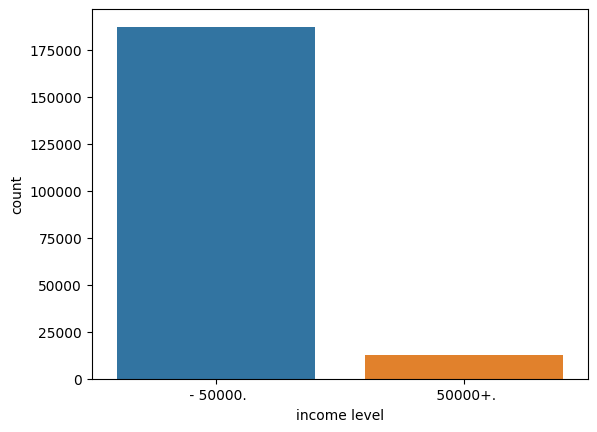

In [85]:
exp_train_set["income level"].value_counts()
sns.countplot(x=exp_train_set["income level"])

In [86]:
print("percentage of - 50K and +50K \n",exp_train_set["income level"].value_counts()/len(exp_train_set)*100)

percentage of - 50K and +50K 
  - 50000.    93.794168
 50000+.      6.205832
Name: income level, dtype: float64


Comments: We face a severe imbalance which is challenging to model and require specialized techniques.<br>
The majority class is -50000 and the minority one is +50000

### Age & Gender

From a problem understanding the age is one of the most important feature as a children or a retired person might have a significant difference about the income level, let's confirm this hypothesis with an exploration

<AxesSubplot: xlabel='age', ylabel=' 50000+.'>

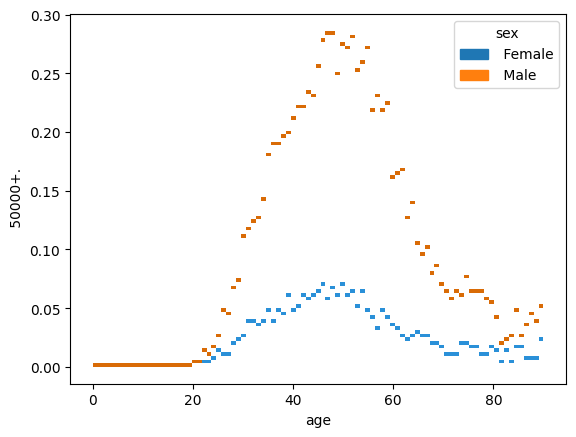

In [87]:
import seaborn as sns
%matplotlib inline
exp_proportion_income_age = exp_train_set.groupby(['age','sex']).agg({' 50000+.': 'mean'}).reset_index()
# plotting histogram
sns.histplot(exp_proportion_income_age, x="age",y=' 50000+.', hue="sex", element="poly", kde=True, bins=len(exp_proportion_income_age['age'].unique()))


Comments: 
- Under 18 no income 
- Between 18 and 20 the first persons with 50K income appear
- We observe a peak around 50 year old for both gender, however women have a smaller progression between 20 and 40 for woman 

### Categorical features: People situation 

Many features characterizing a person:
- Marital status
- Race
- Hispanic origin
- Citizenship 

One way to plot a graph to explore the relationship between two categorical features is to use a stacked bar chart. In a stacked bar chart, each category is represented by a bar, and the proportion of the categories within each bar is represented by the height of the bar. 

We will annotate the proportion to have all the relevant information to compare the categorical feature with the target variable

In [88]:
#Concatenate Race and Hispanic Origin 

In [138]:
def categorical_observation_graph(cat1,data=exp_train_set):
    plt.figure(figsize=(30,8))
    # Create the stacked bar chart
    ax = sns.countplot(x=cat1, hue=" 50000+.", data=data, palette=["red", "green"])

    list_annot = []

    for p in ax.patches:
        height = p.get_height()
        list_annot.append(height / data.shape[0] * 100)

    for count, (p, prev, current) in enumerate(zip(ax.patches[int(len(ax.patches)/2):], list_annot[:int(len(ax.patches)/2)], list_annot[int(len(ax.patches)/2):])):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 1,
                '{:.2f}%'.format((current/(prev+current))*100),
                ha="center")        

    black_patch = mpatches.Patch(color ='black',label='Percentage of >50K USD income level in the class')
    red_patch = mpatches.Patch(color ='red',label='Income level >50K USD')
    green_patch = mpatches.Patch(color ='green',label='Income level <50K USD')
    
    plt.legend(handles=[black_patch, red_patch, green_patch])
    plt.title("{} vs income level (1 superior to 50K USD and 0 inferior) of US Population (US Census extract) ".format(cat1))
    # Show the plot
    plt.show()


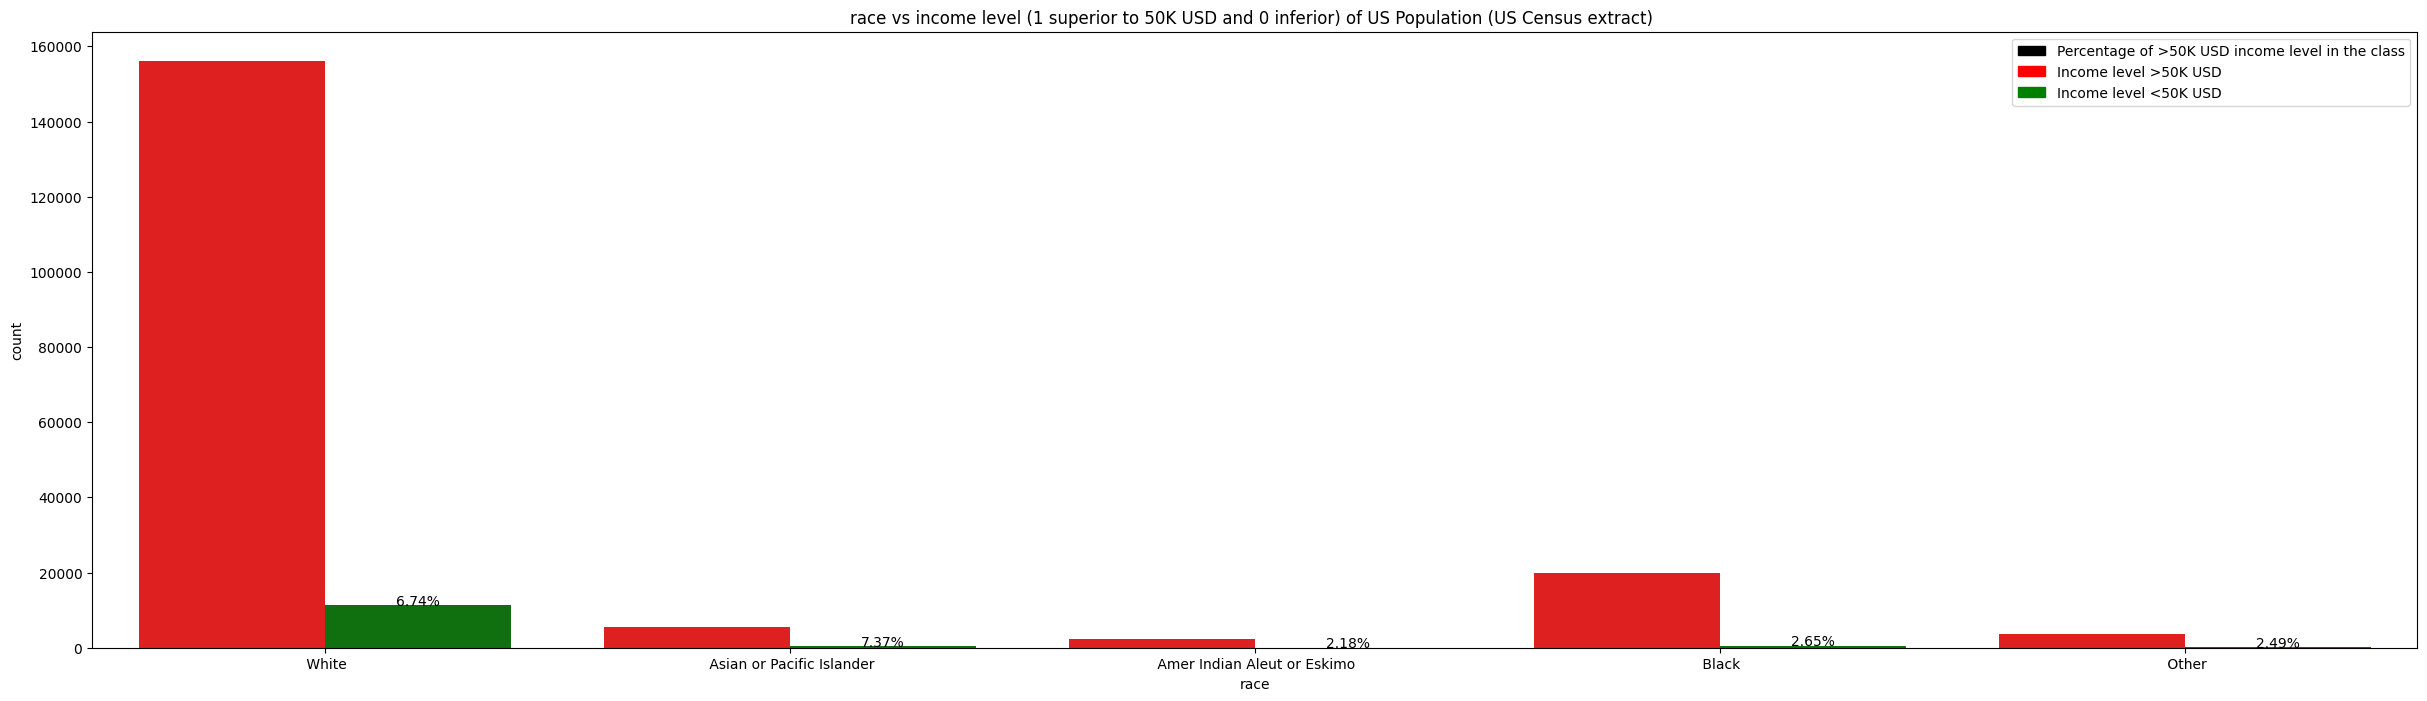

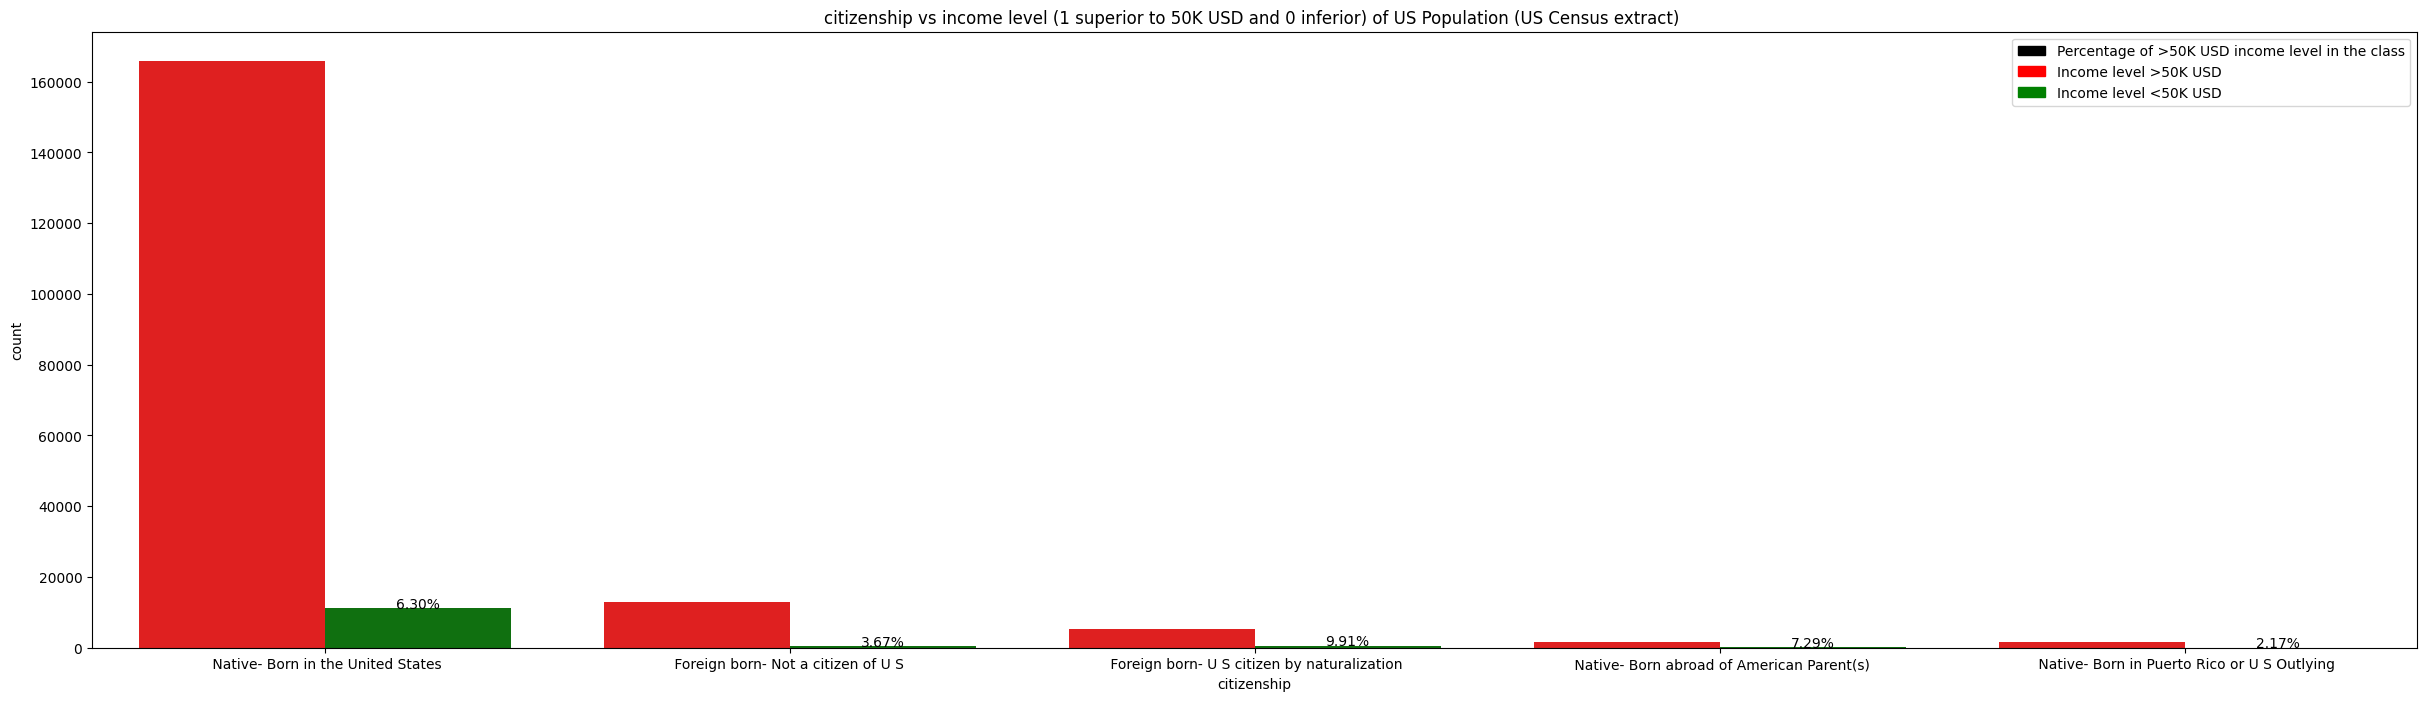

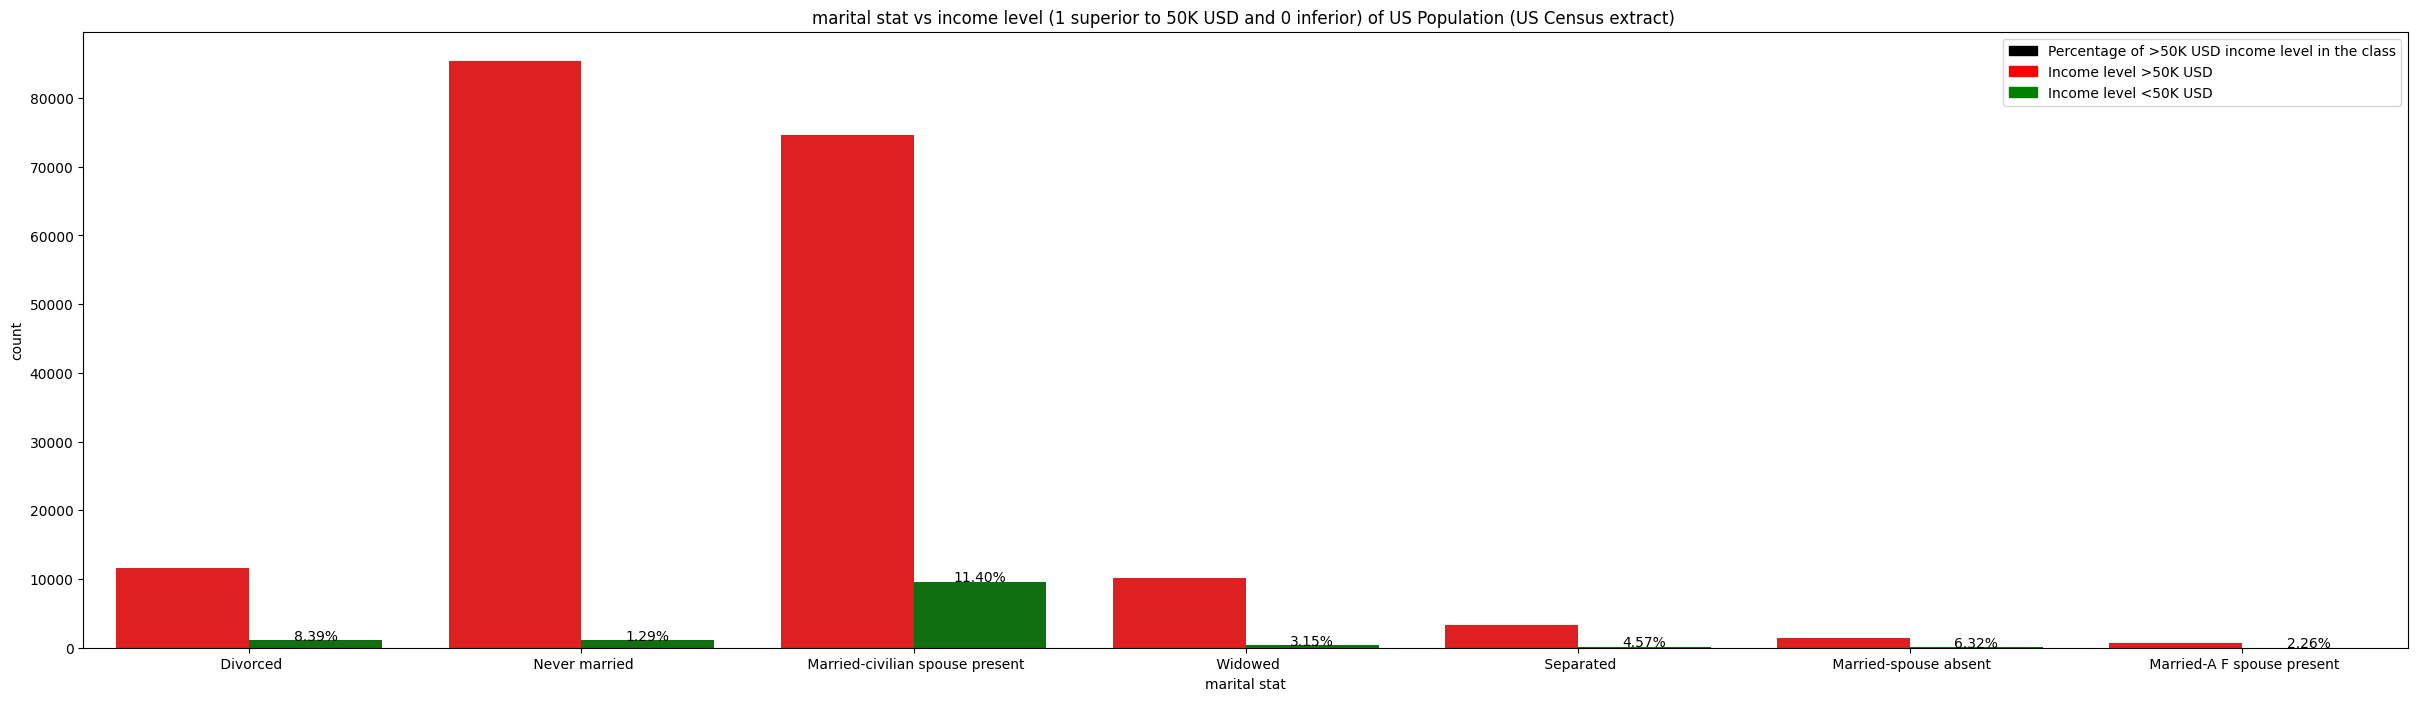

In [90]:
cat_var = ['race', 'citizenship','marital stat']
for column in cat_var:
    categorical_observation_graph(column)

Comments: 
- Race: White has higher proportion of high income level compared to other races, we are missing the hispanic information, let's combine the hispanic origin column with the race 
- Married persons has an higher proportion of high income level but this might be related to the age (let's explore further) 

### Categorical features: Work features exploration
- Education
- Major industry code
- Major occupation code
- Reason for unemployment
- Full or part time employment stat

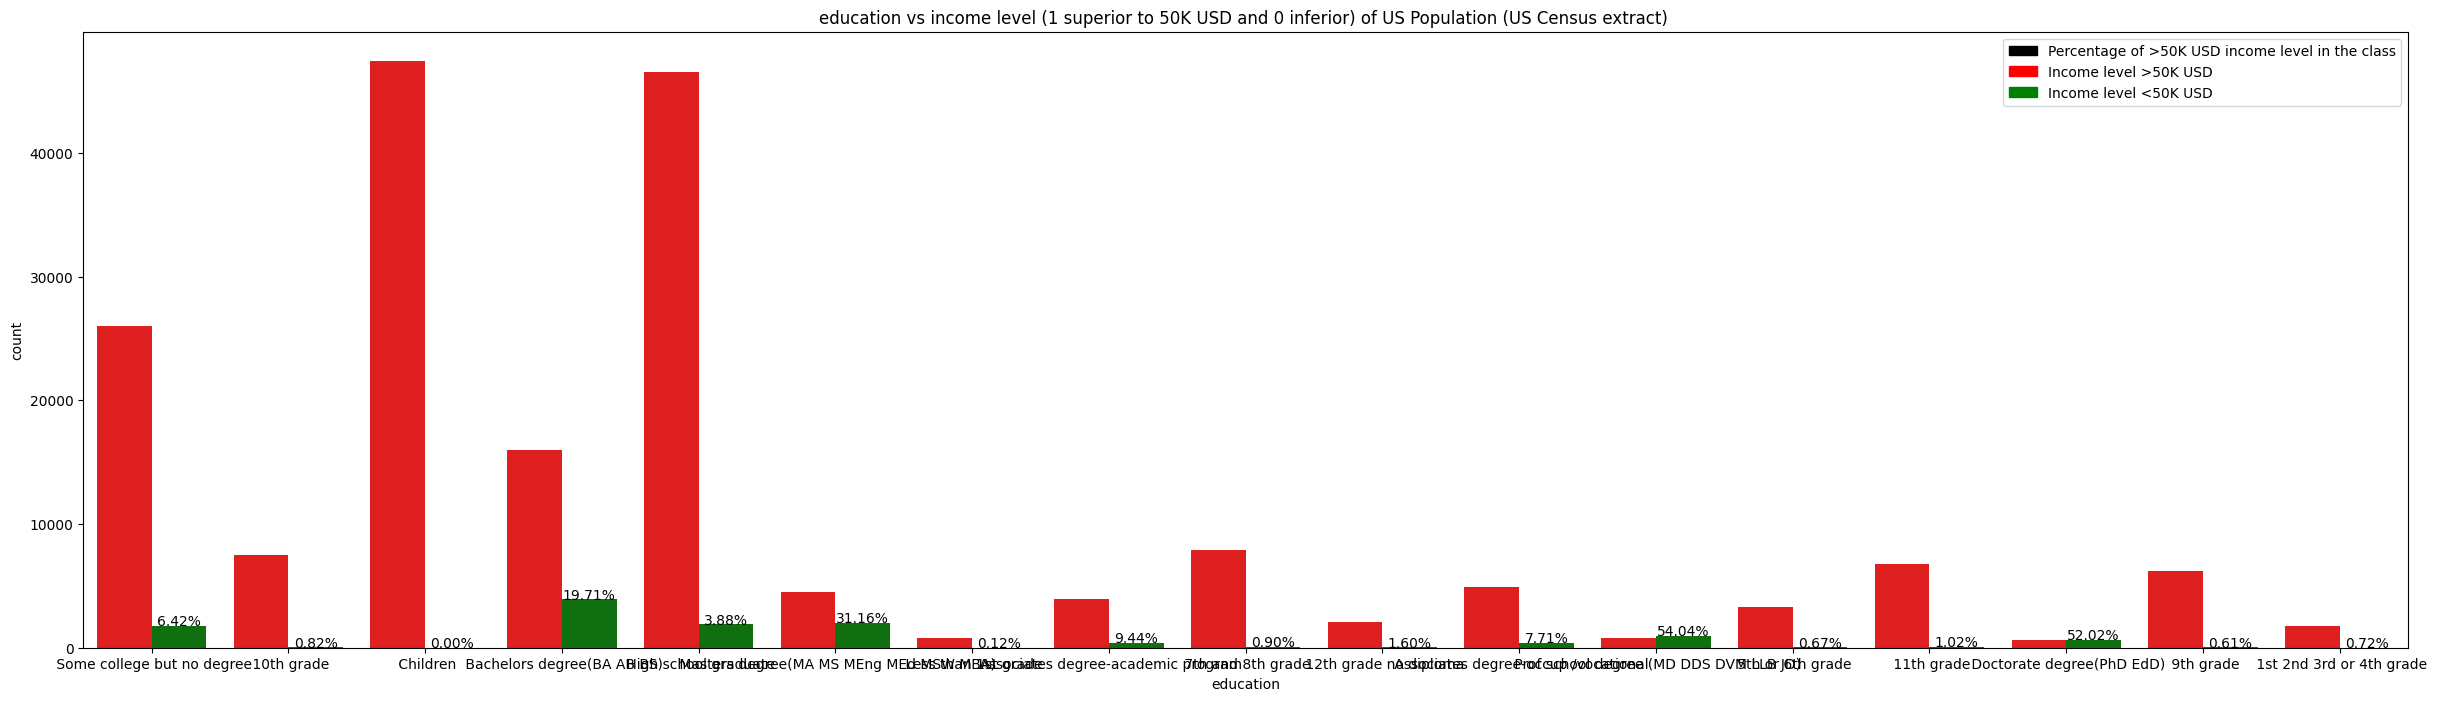

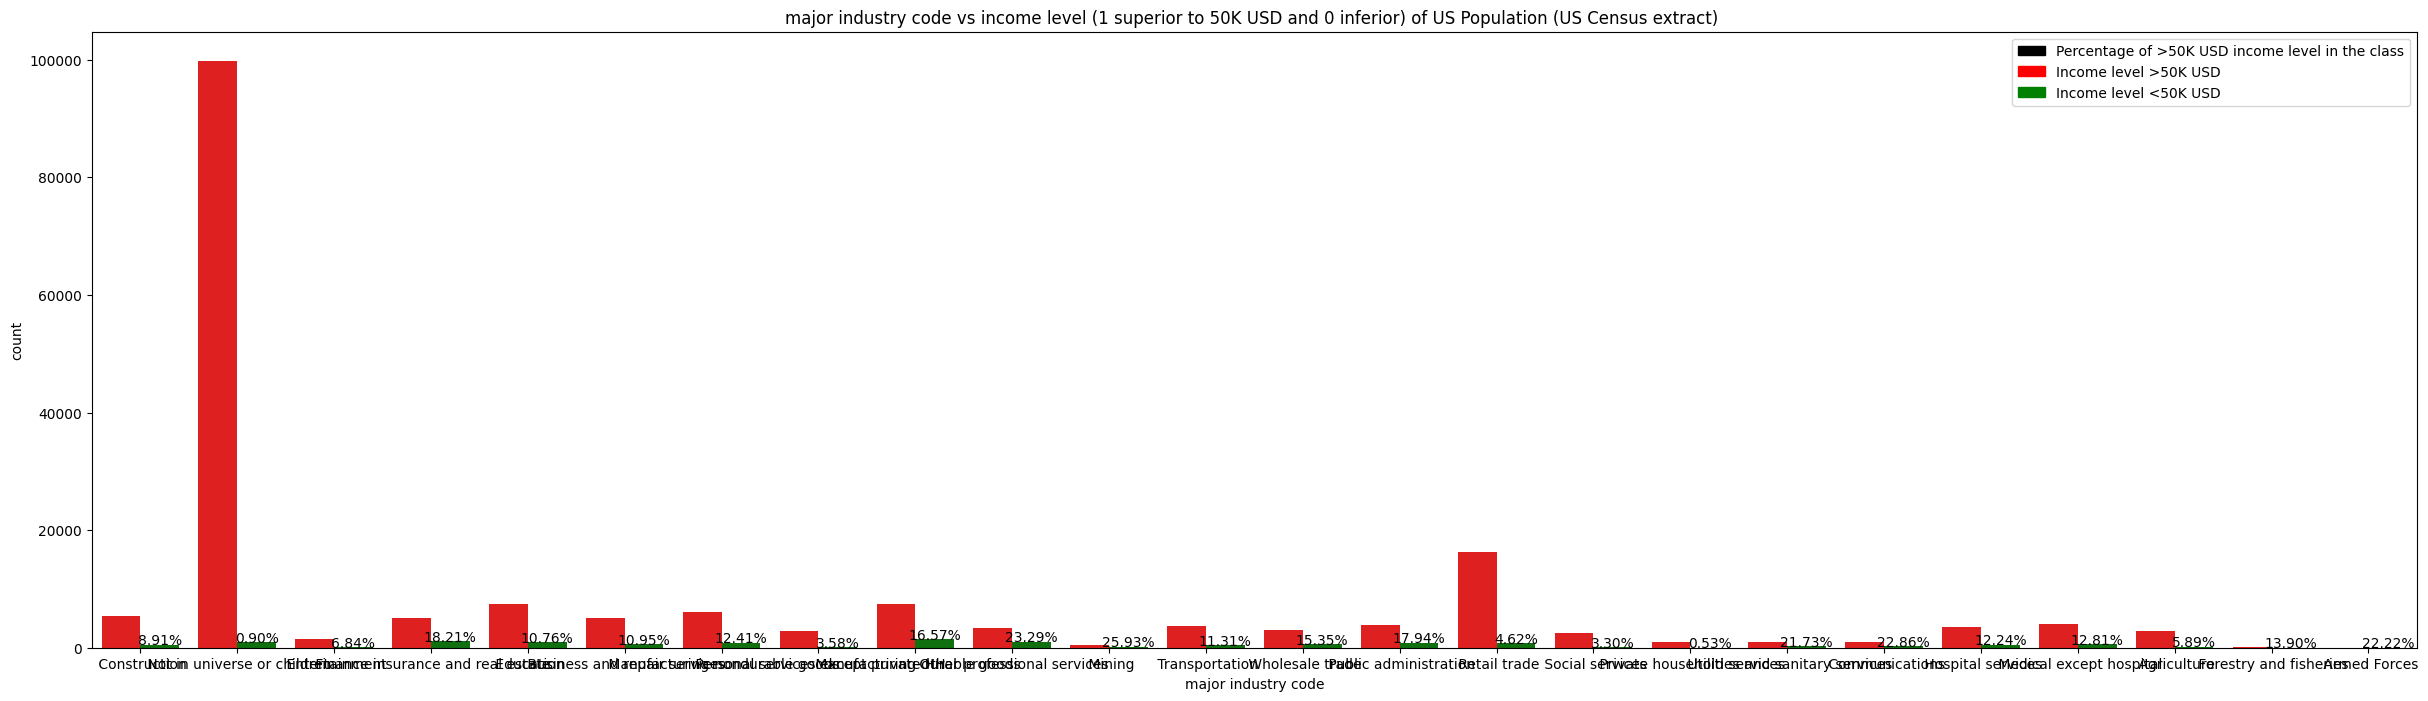

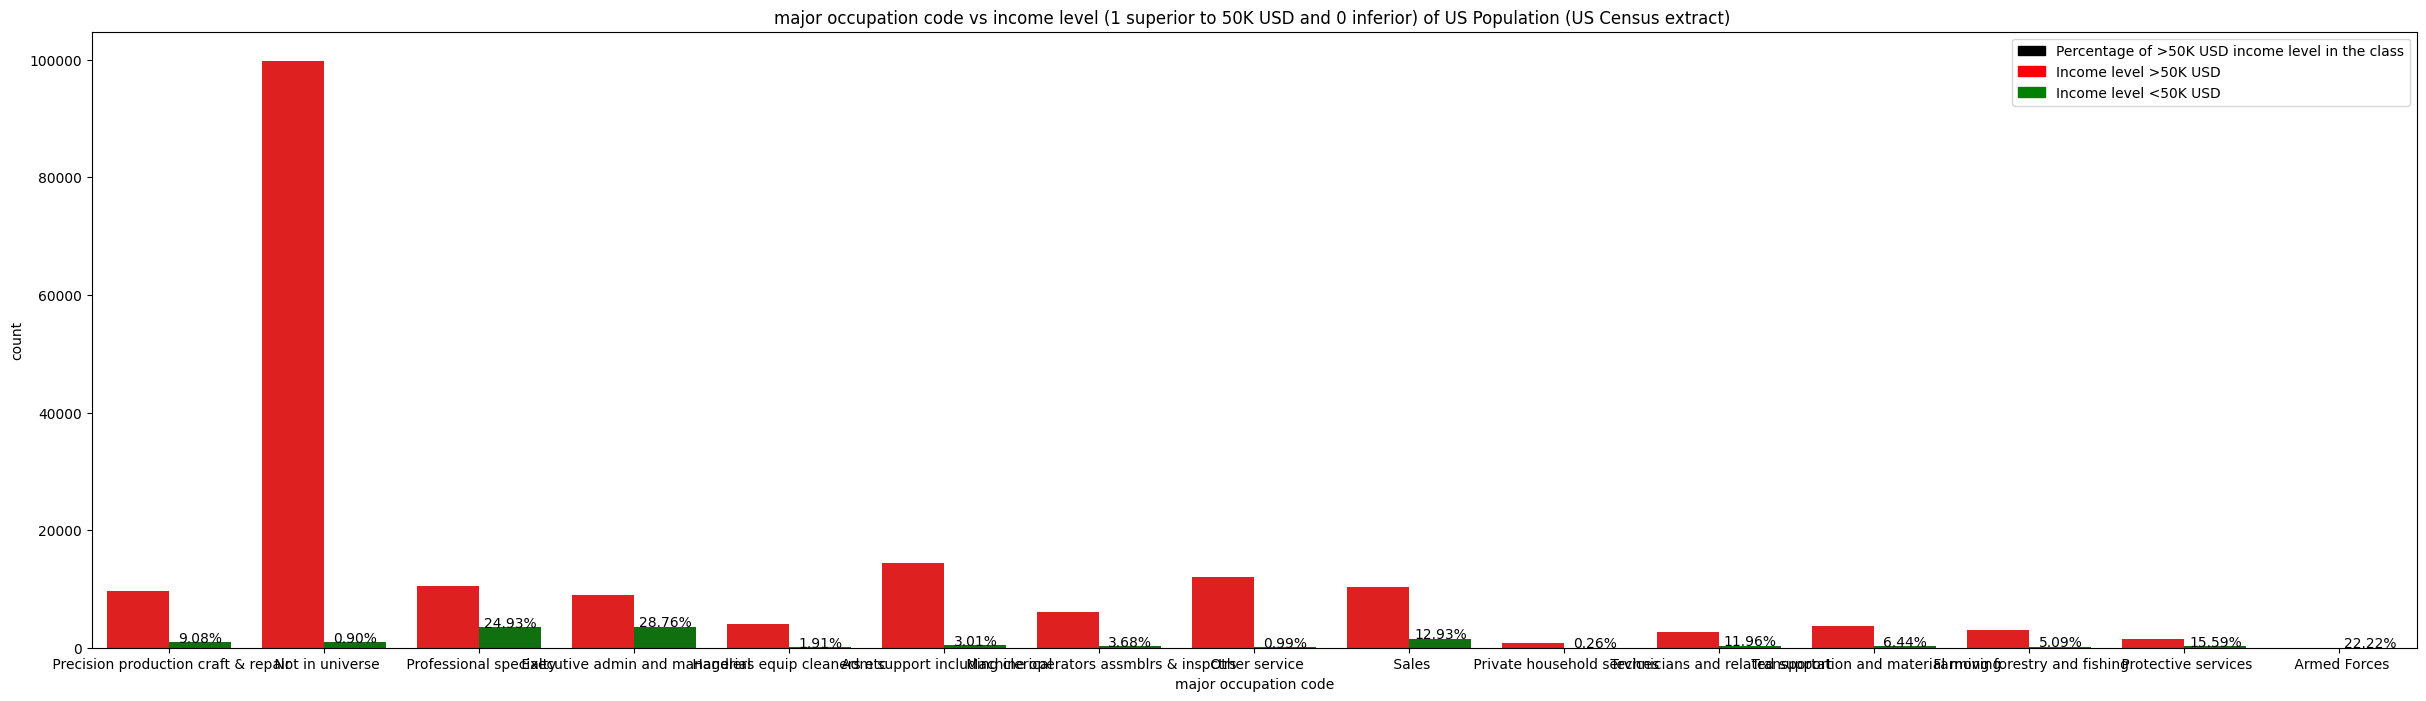

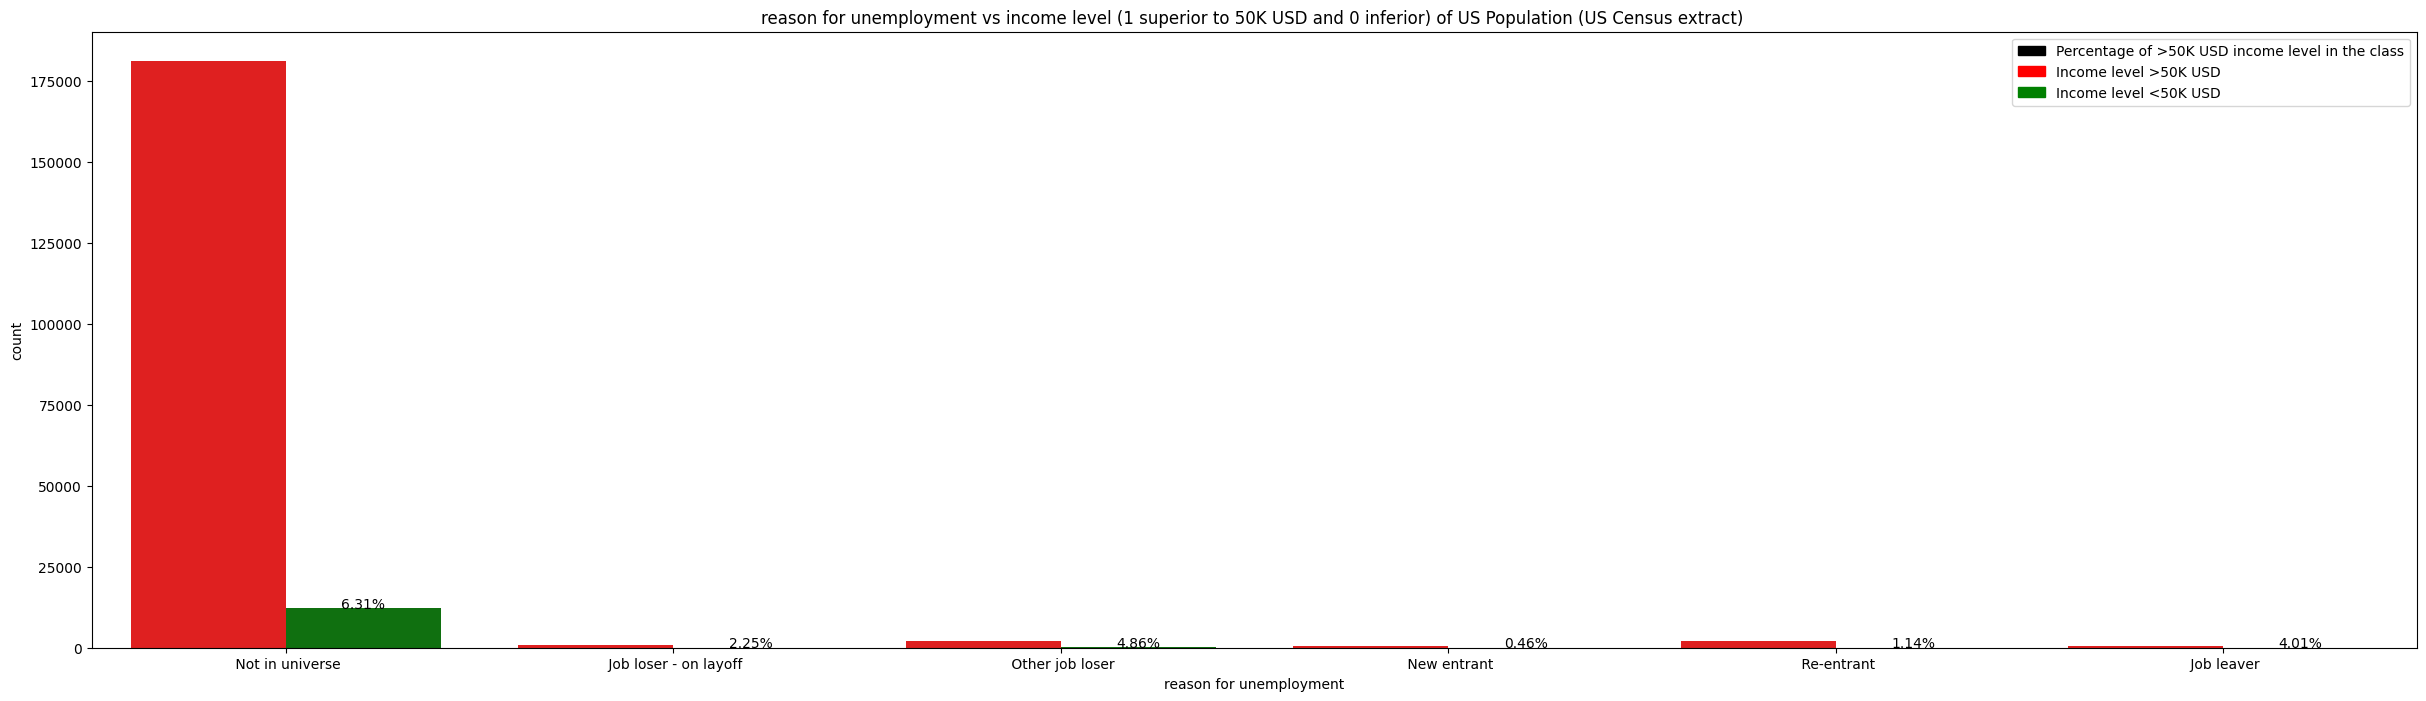

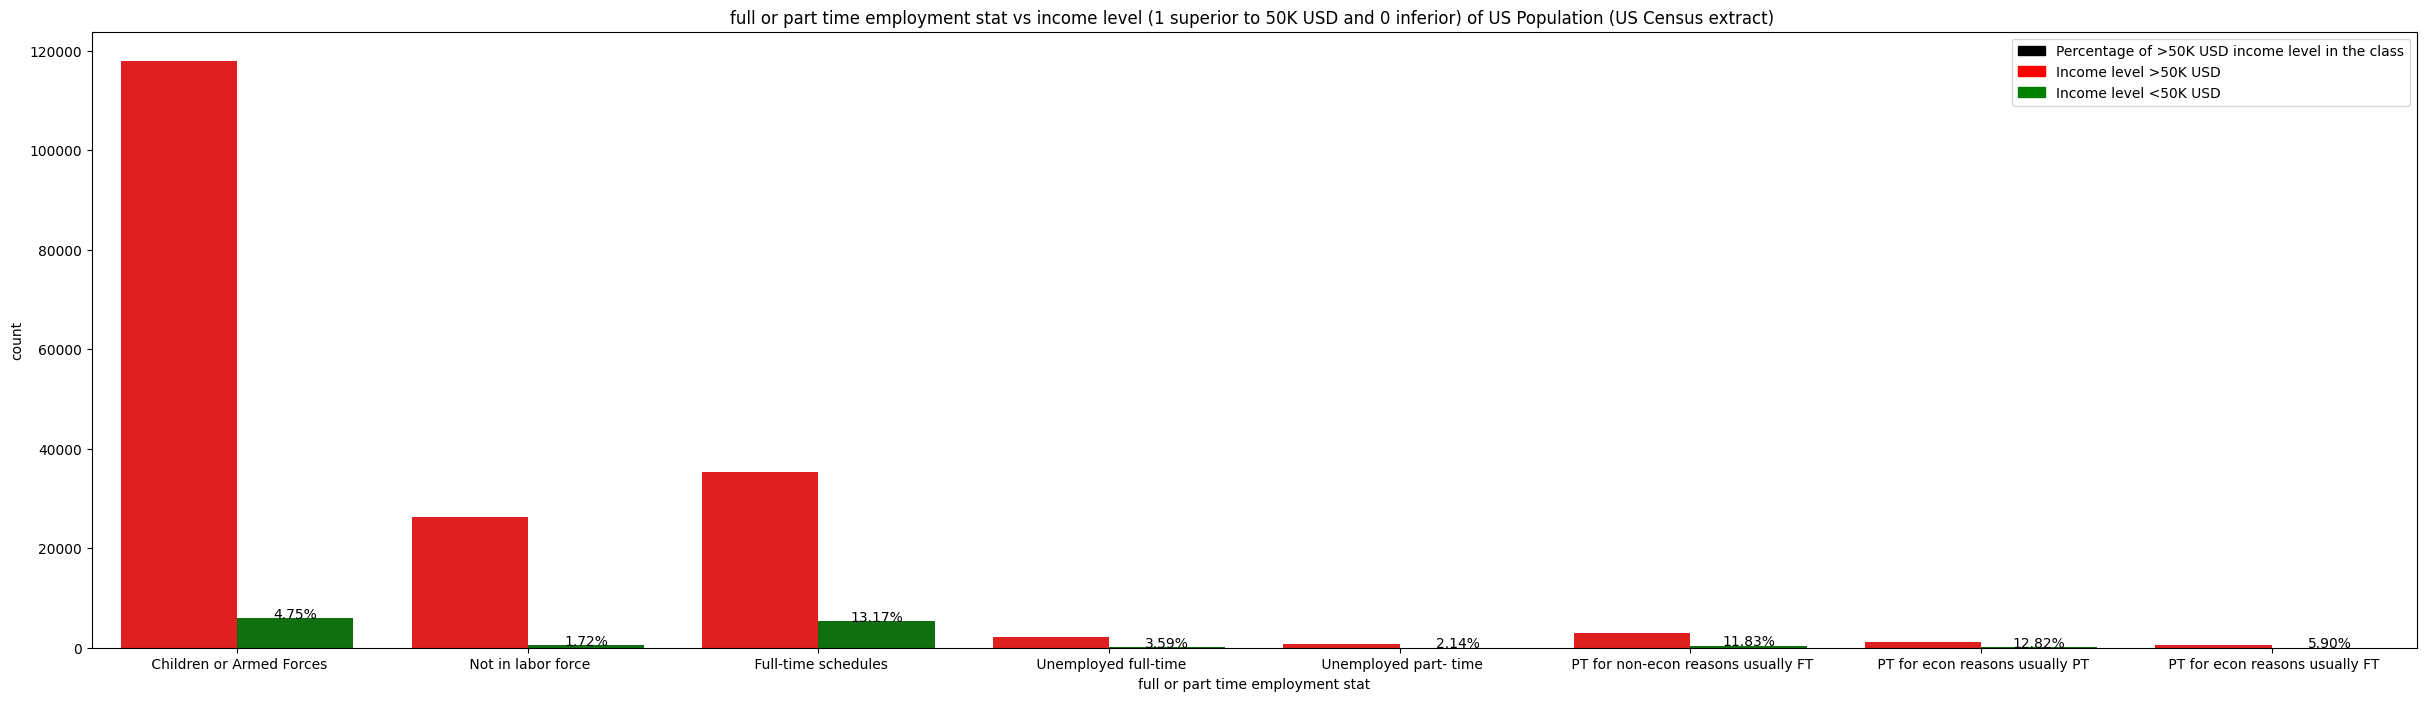

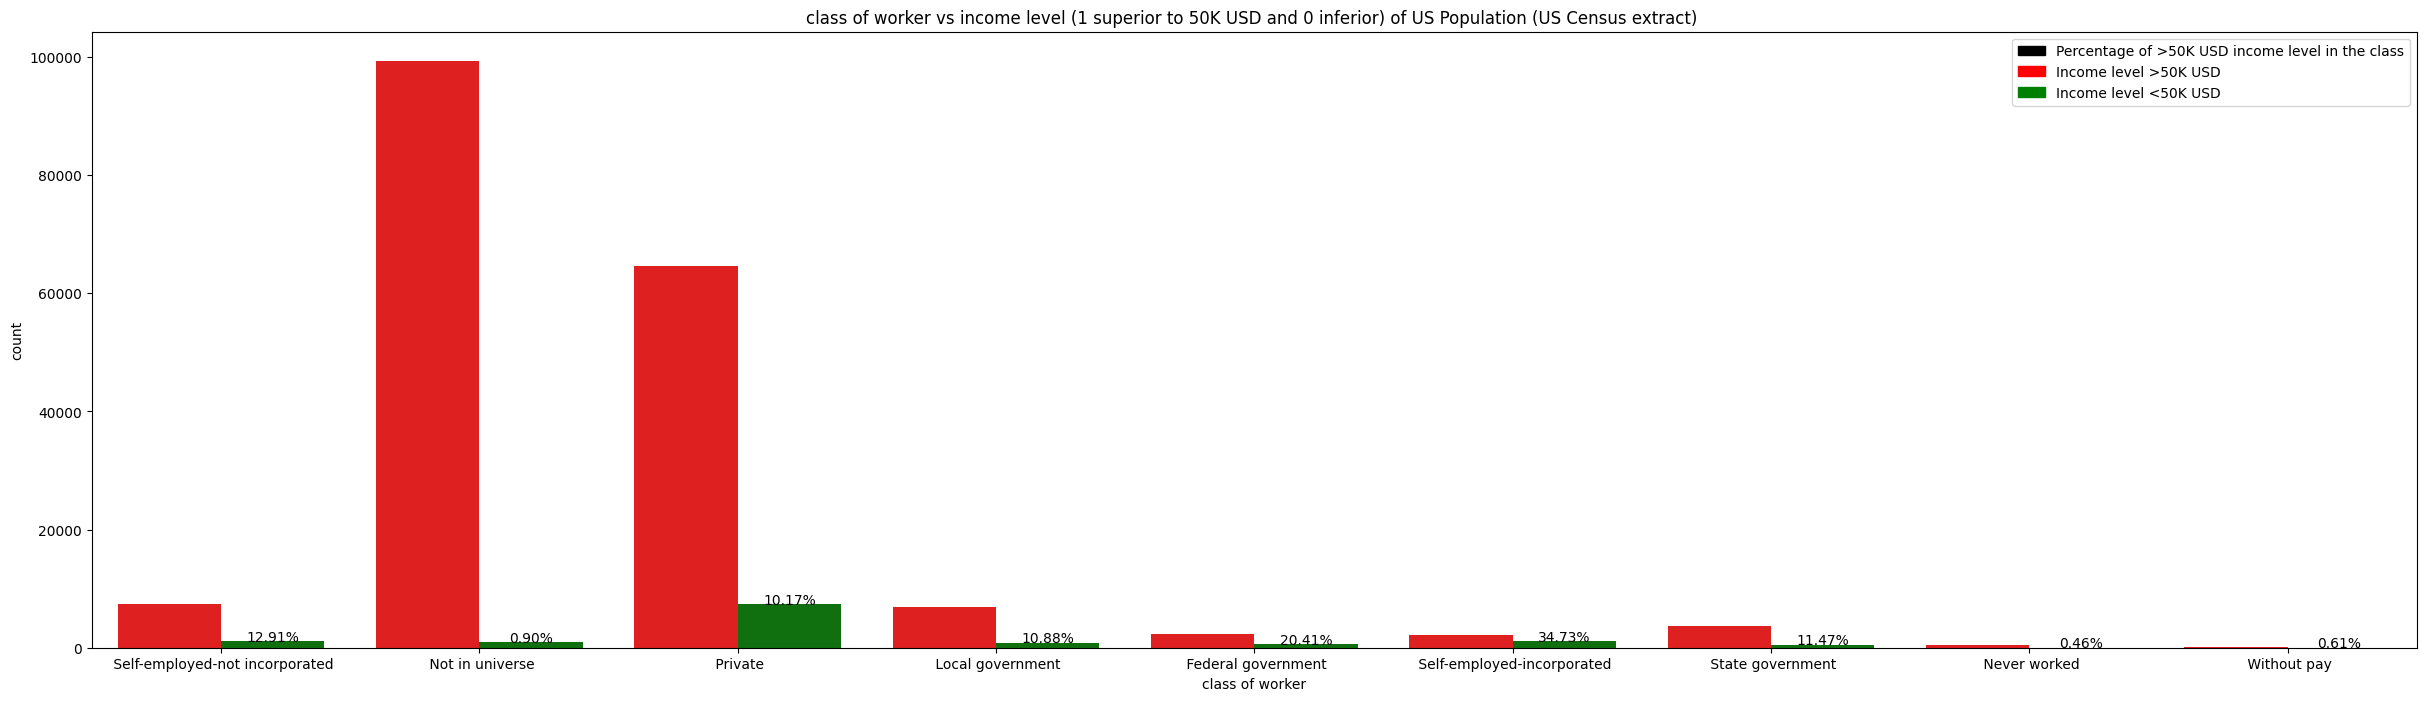

In [91]:
work_cat_columns = ["education", "major industry code", "major occupation code","reason for unemployment", "full or part time employment stat","class of worker"]
for column in work_cat_columns:
    categorical_observation_graph(column)

#### High cardinality features

In [92]:
value_counts = exp_train_set['major industry code'].value_counts()
threshold = 0.02 * len(exp_train_set['major industry code'])
filtered_values = value_counts[value_counts < threshold]

# Afficher les valeurs uniques filtrées
print(filtered_values.index)

Index([' Hospital services', ' Wholesale trade', ' Agriculture',
       ' Personal services except private HH', ' Social services',
       ' Entertainment', ' Communications', ' Utilities and sanitary services',
       ' Private household services', ' Mining', ' Forestry and fisheries',
       ' Armed Forces'],
      dtype='object')


In [93]:
value_counts = exp_train_set['major occupation code'].value_counts()
threshold = 0.02 * len(exp_train_set['major occupation code'])
filtered_values = value_counts[value_counts < threshold]

# Afficher les valeurs uniques filtrées
print(filtered_values.index)

Index([' Farming forestry and fishing', ' Technicians and related support',
       ' Protective services', ' Private household services', ' Armed Forces'],
      dtype='object')


### Categorical features: Household features observations

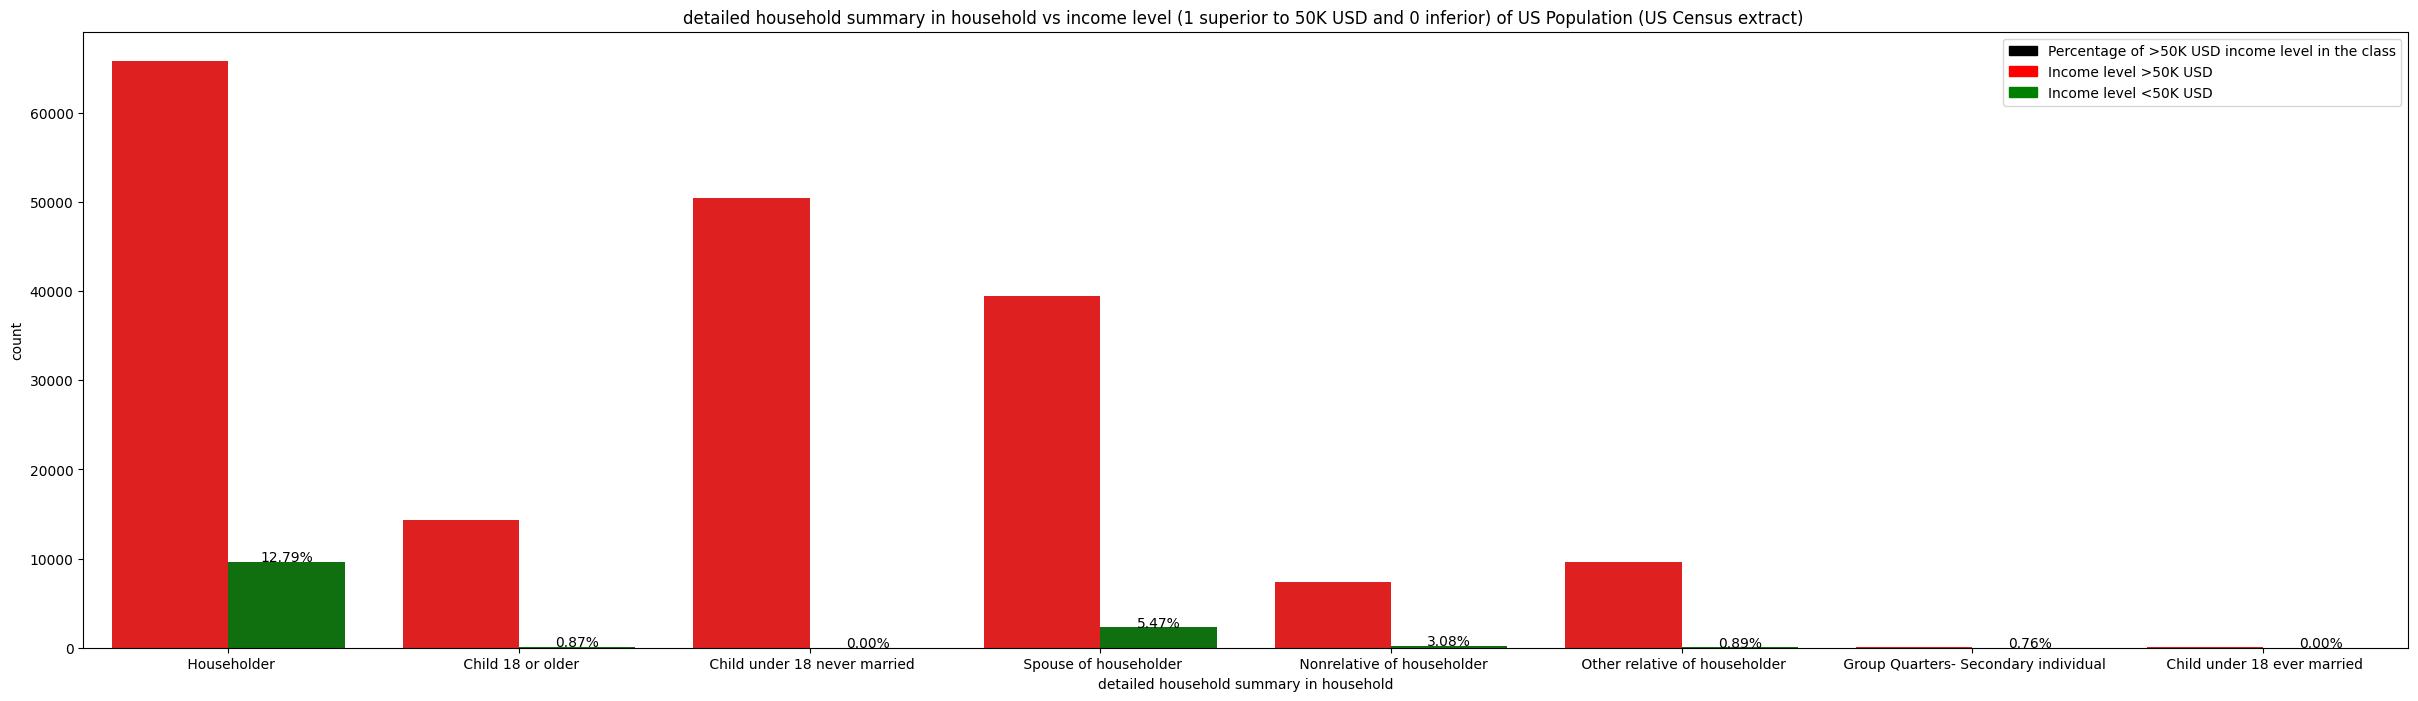

In [94]:
categorical_observation_graph('detailed household summary in household')

In [95]:
exp_train_set['detailed household summary in household'].value_counts()

 Householder                             75475
 Child under 18 never married            50426
 Spouse of householder                   41709
 Child 18 or older                       14430
 Other relative of householder            9702
 Nonrelative of householder               7601
 Group Quarters- Secondary individual      132
 Child under 18 ever married                47
Name: detailed household summary in household, dtype: int64

In [96]:
exp_train_set['detailed household and family stat'].value_counts()

 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1955
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
 Child 18+ ever marr Not in a subfamily              1013
 Child under 18 of RP of unrel subfamily              732
 RP of unrelated subfamily                            685
 Child 18+ ever marr RP of subfamily                  671
 Other Rel 18+ ever marr RP of subfamily              656
 Other Rel <18 never marr child of subfamily RP       656
 Other Rel 18+ spouse of subfamily RP                 638
 Child 18+ nev

### Other categorical features 


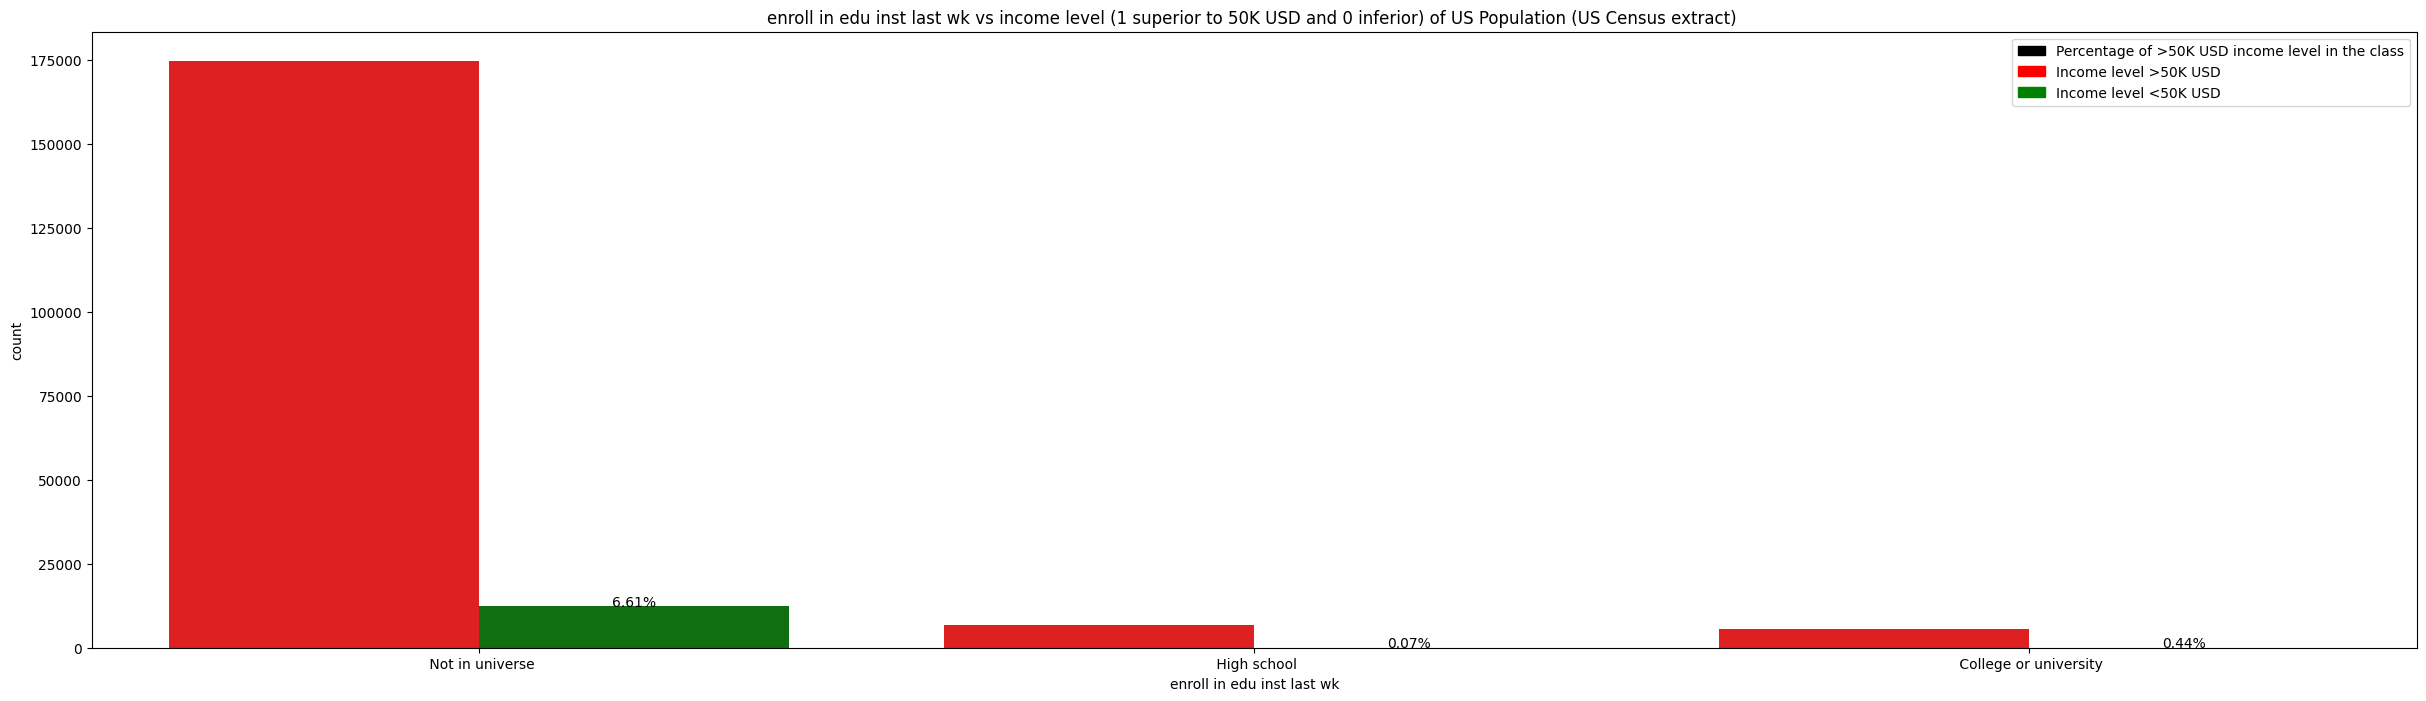

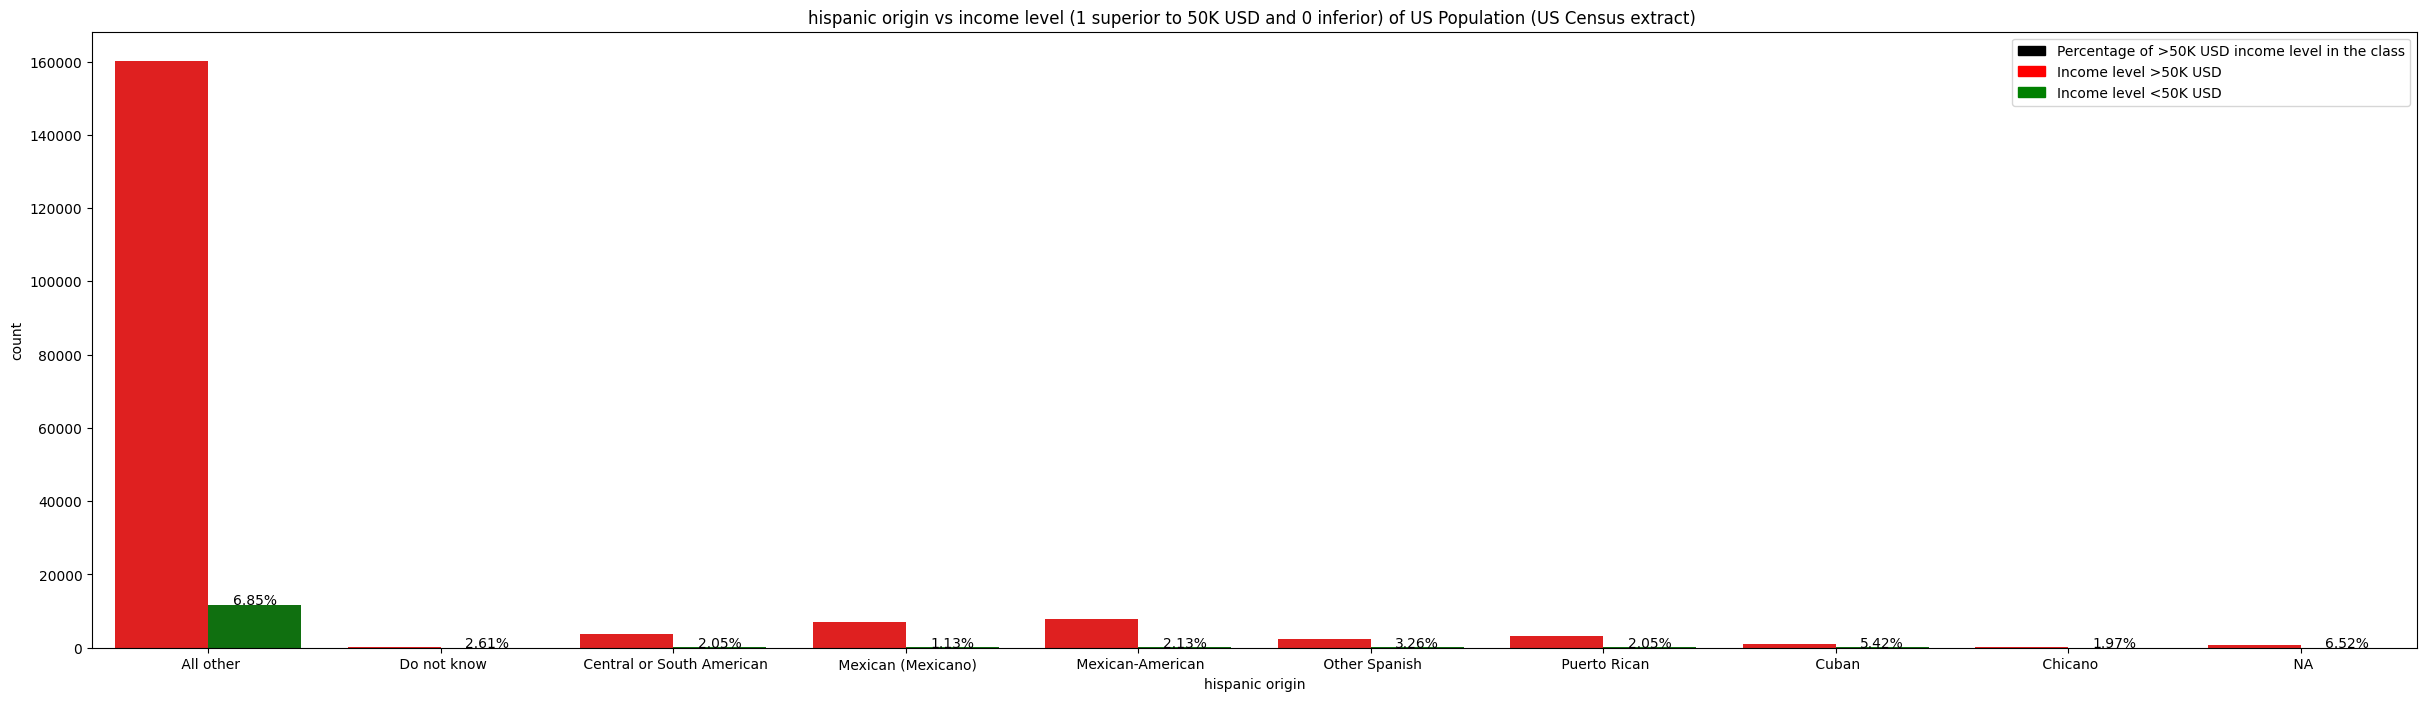

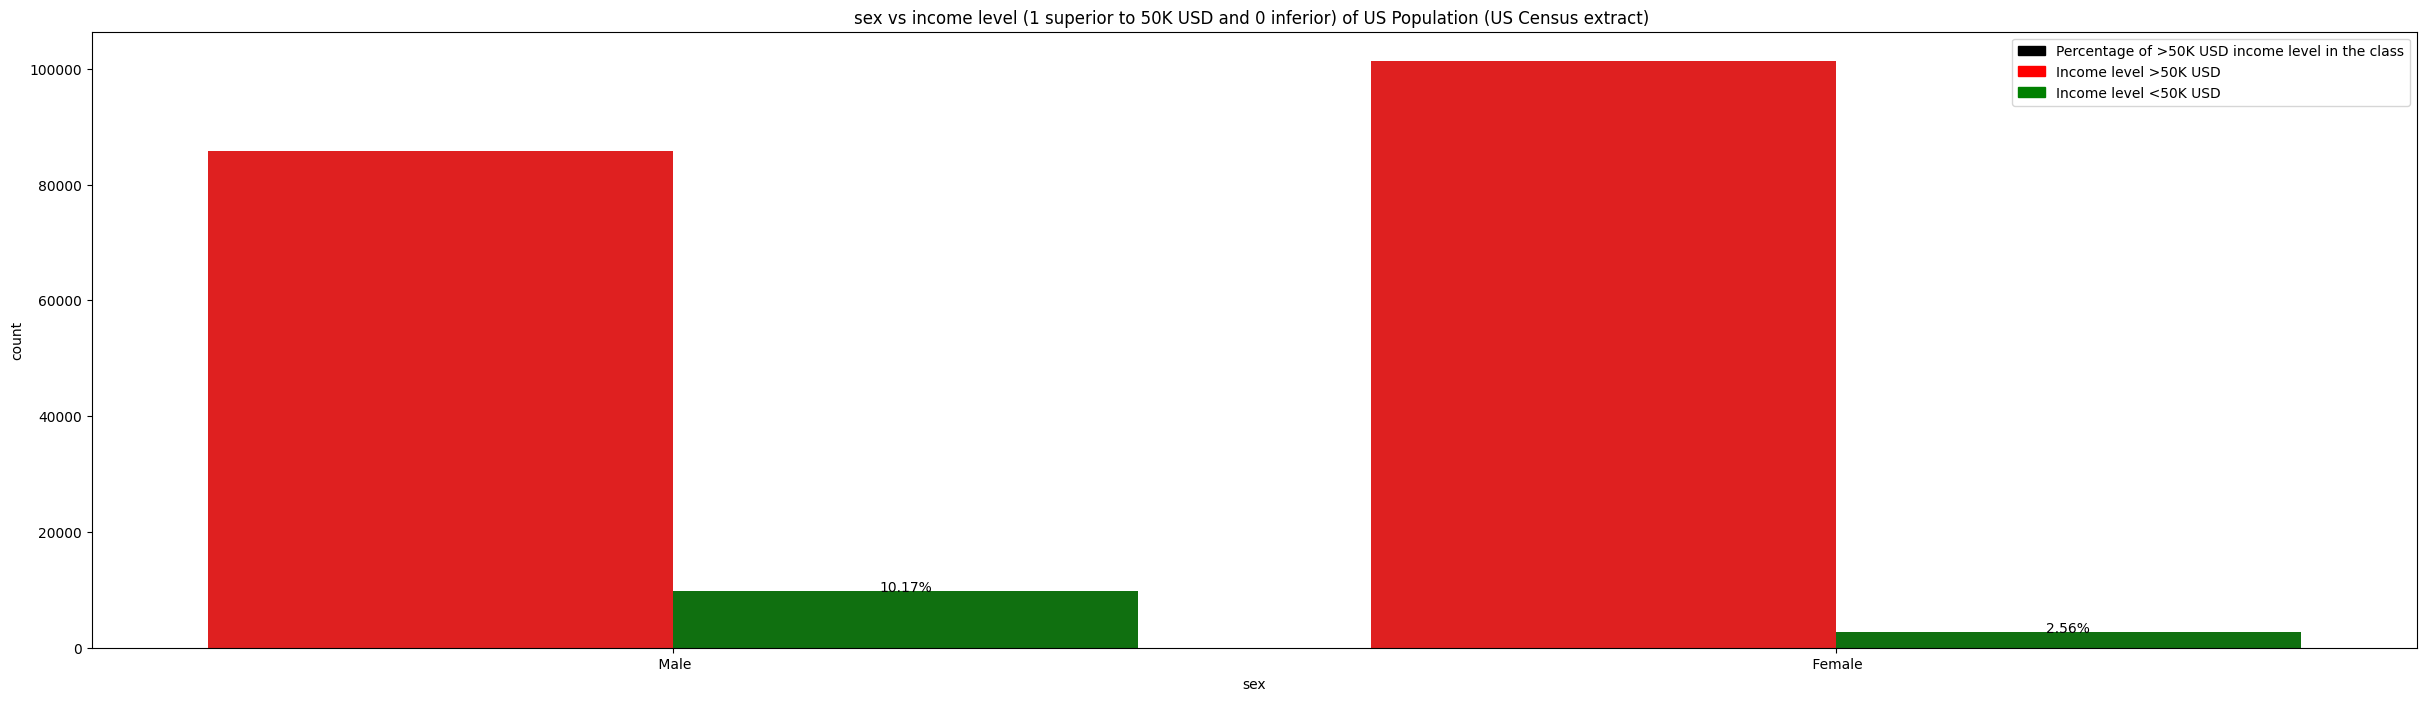

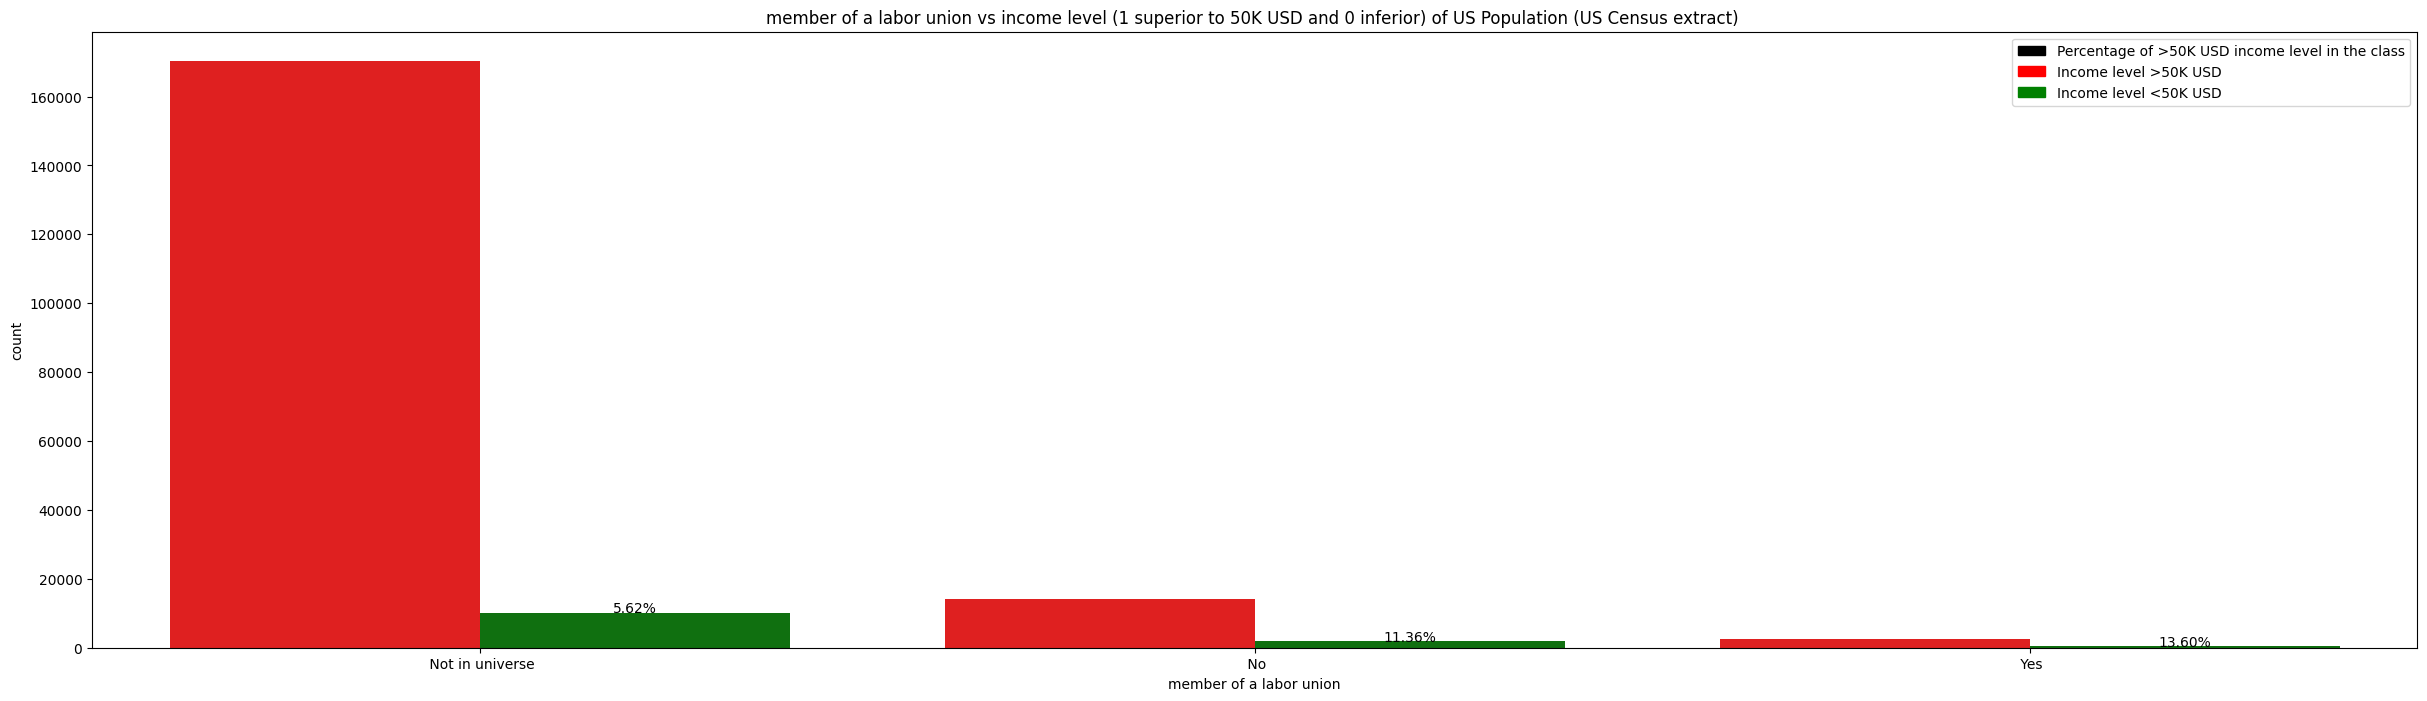

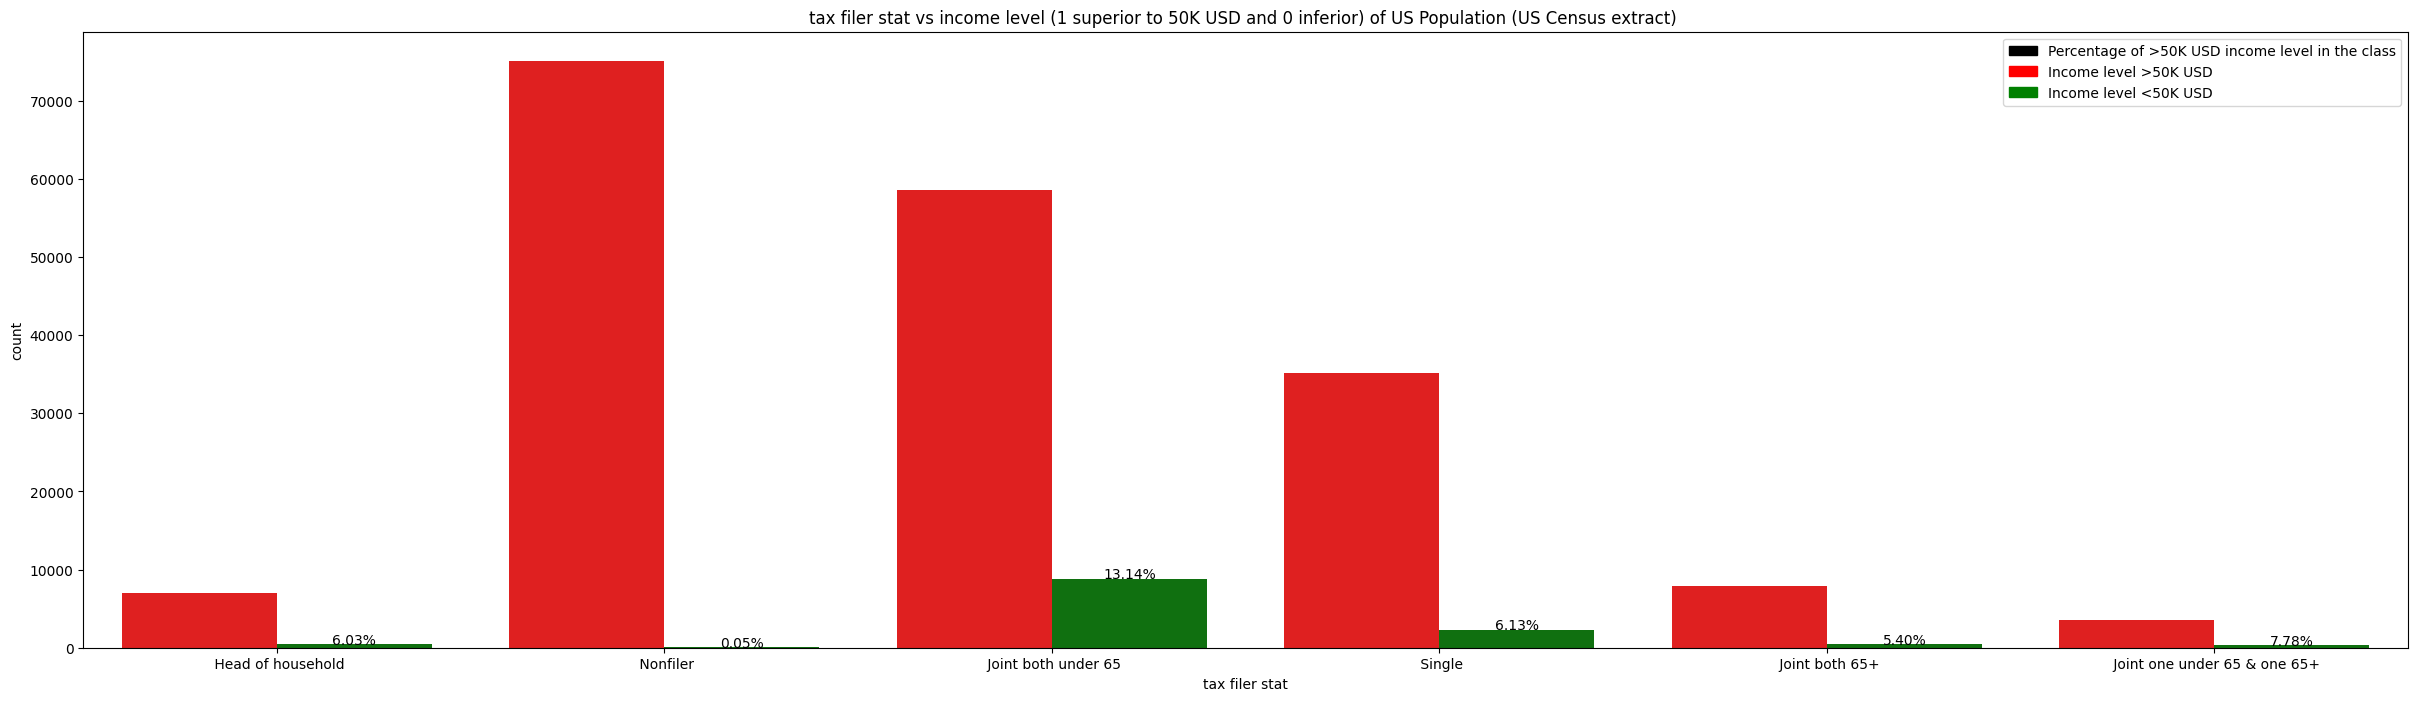

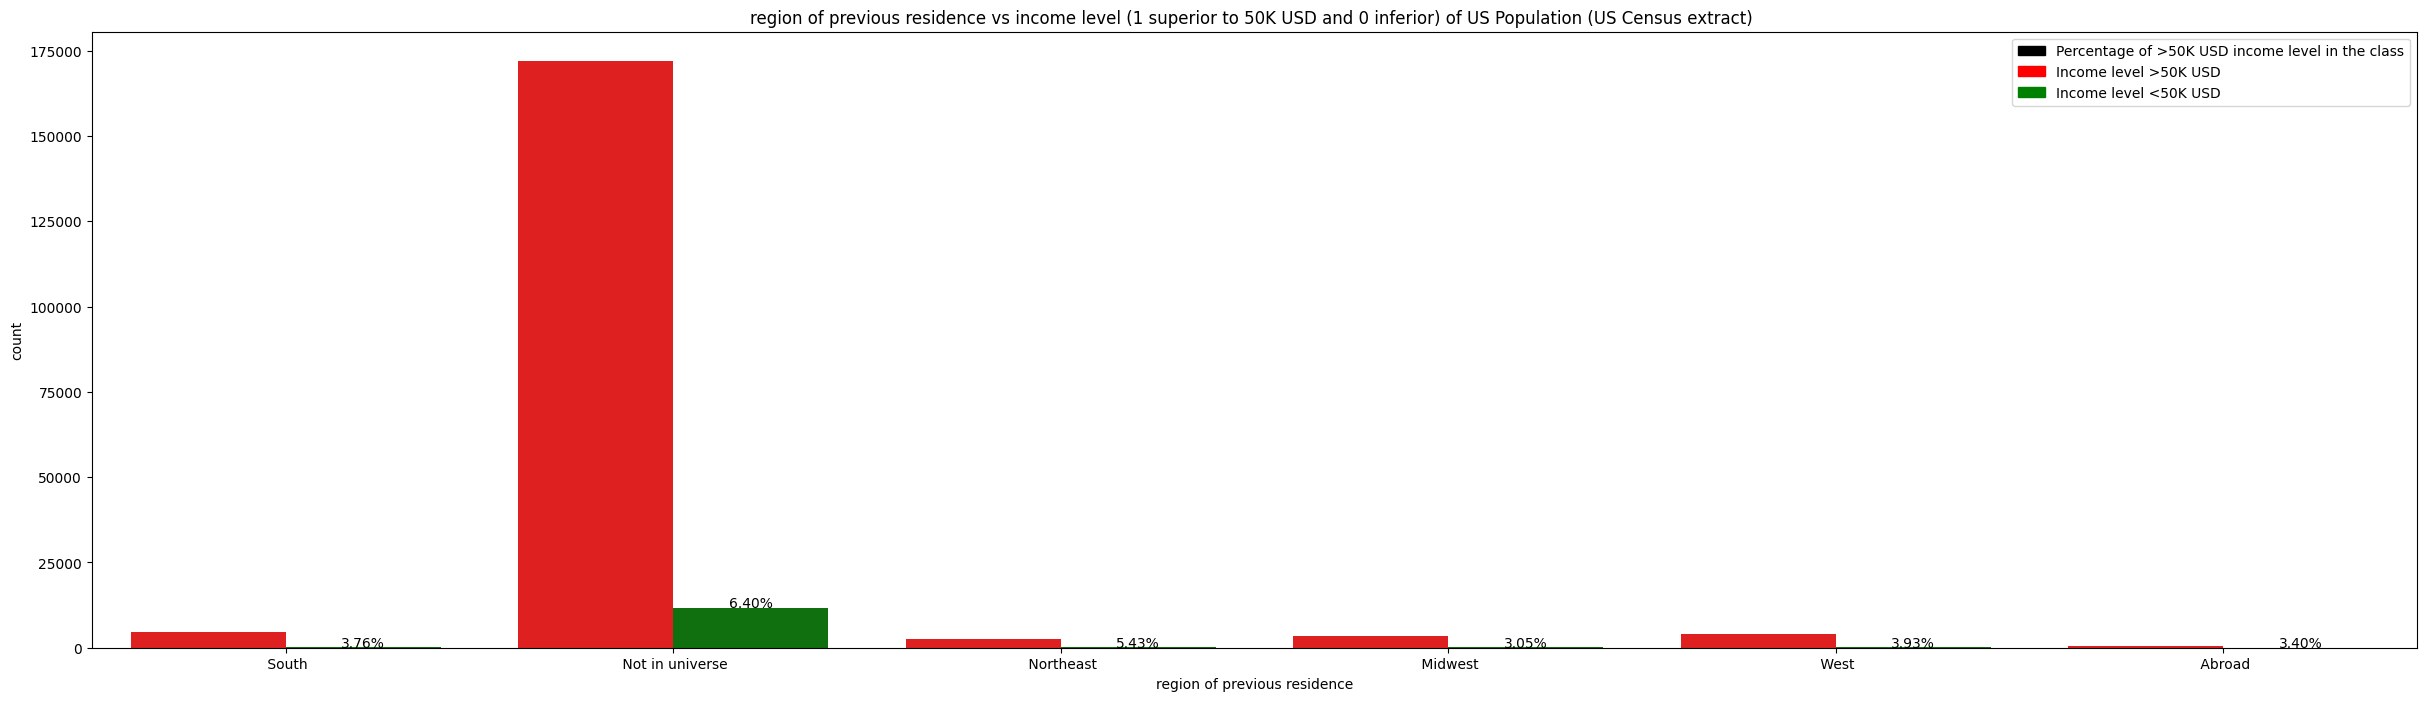

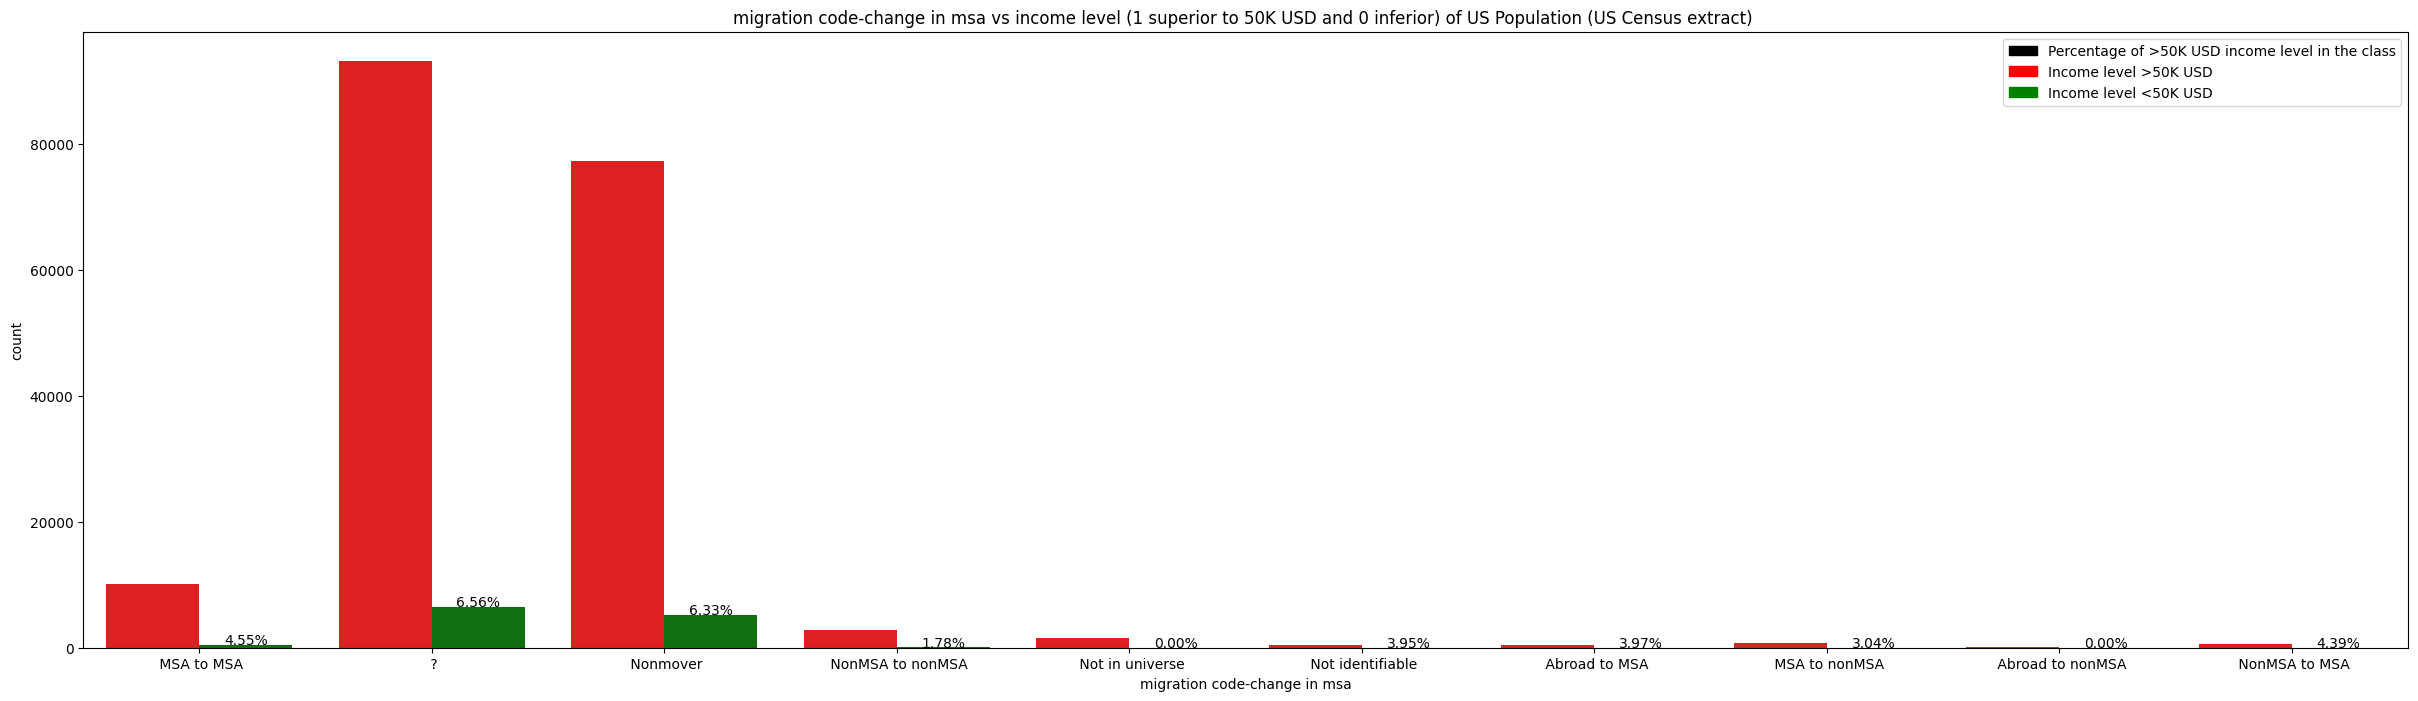

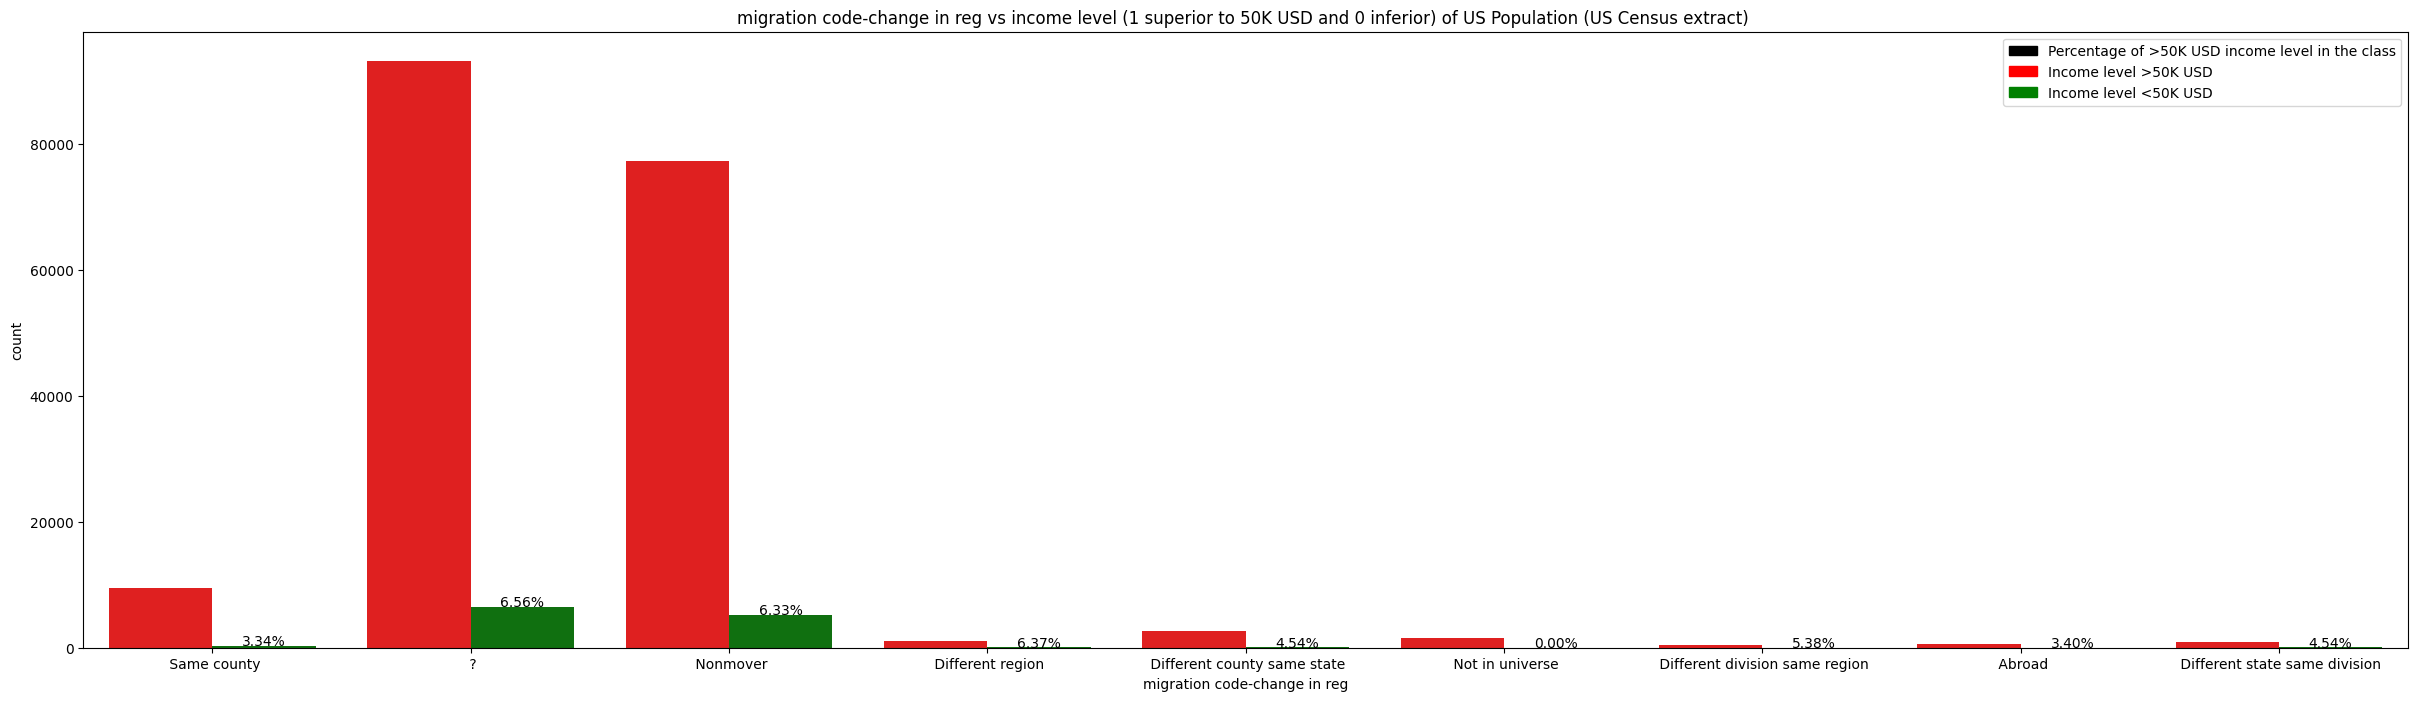

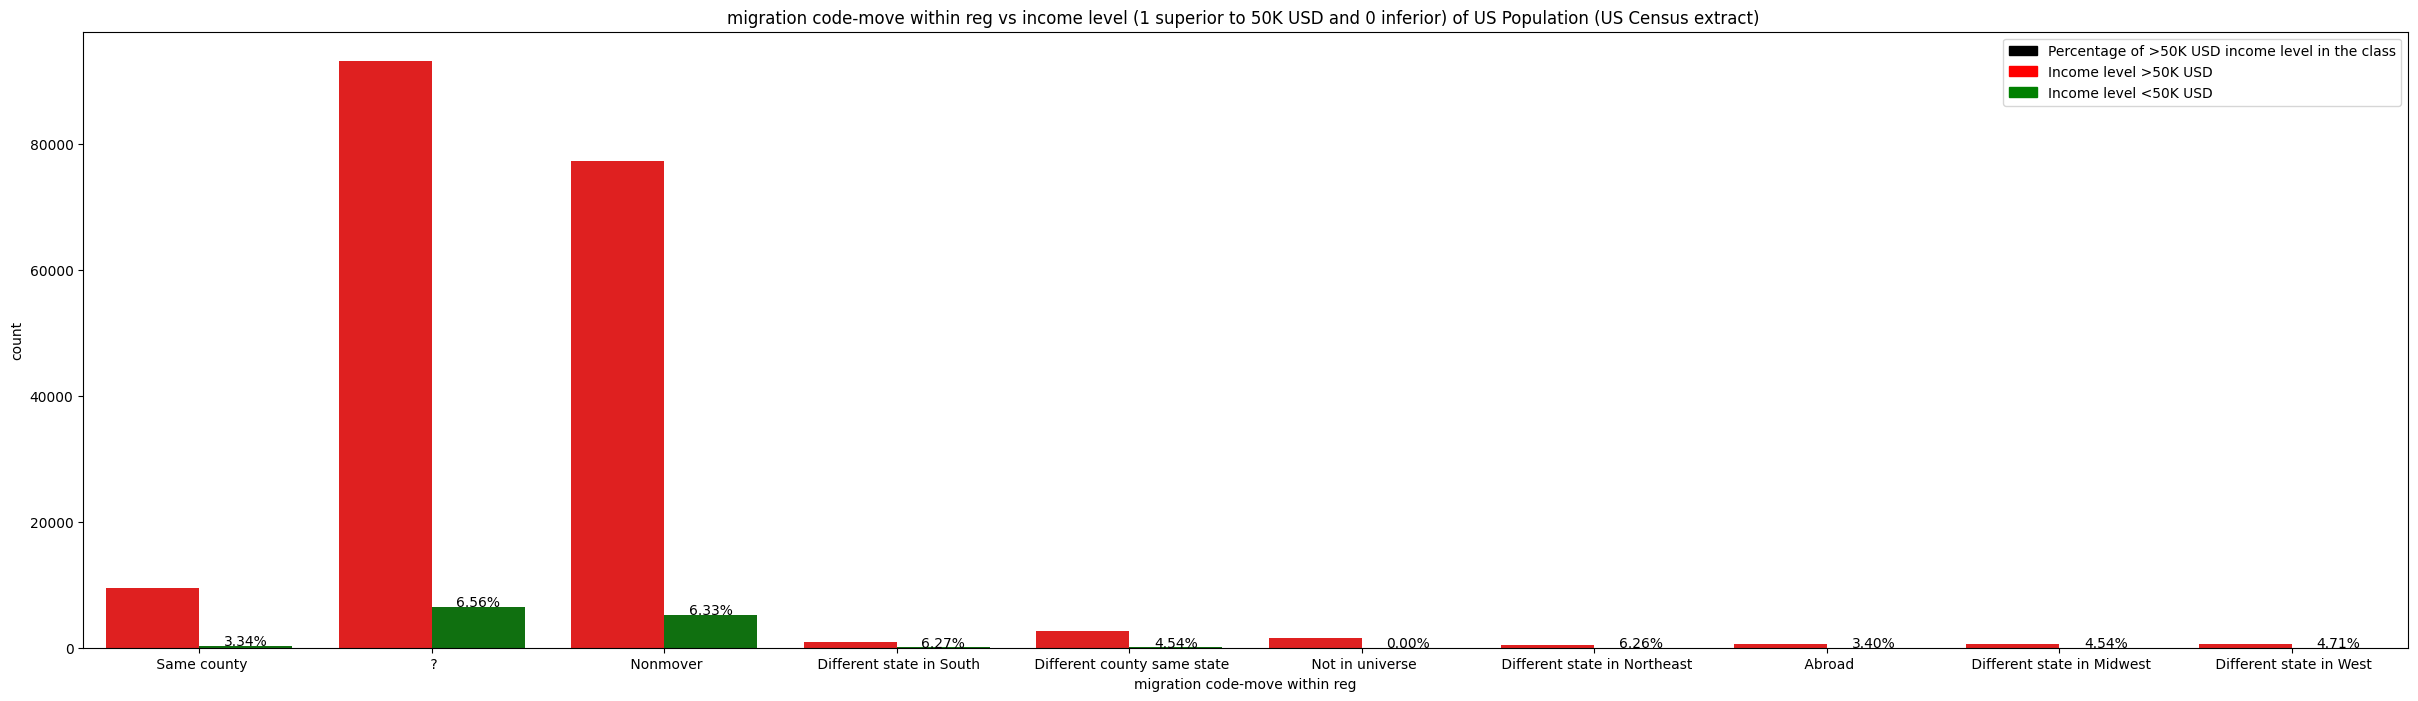

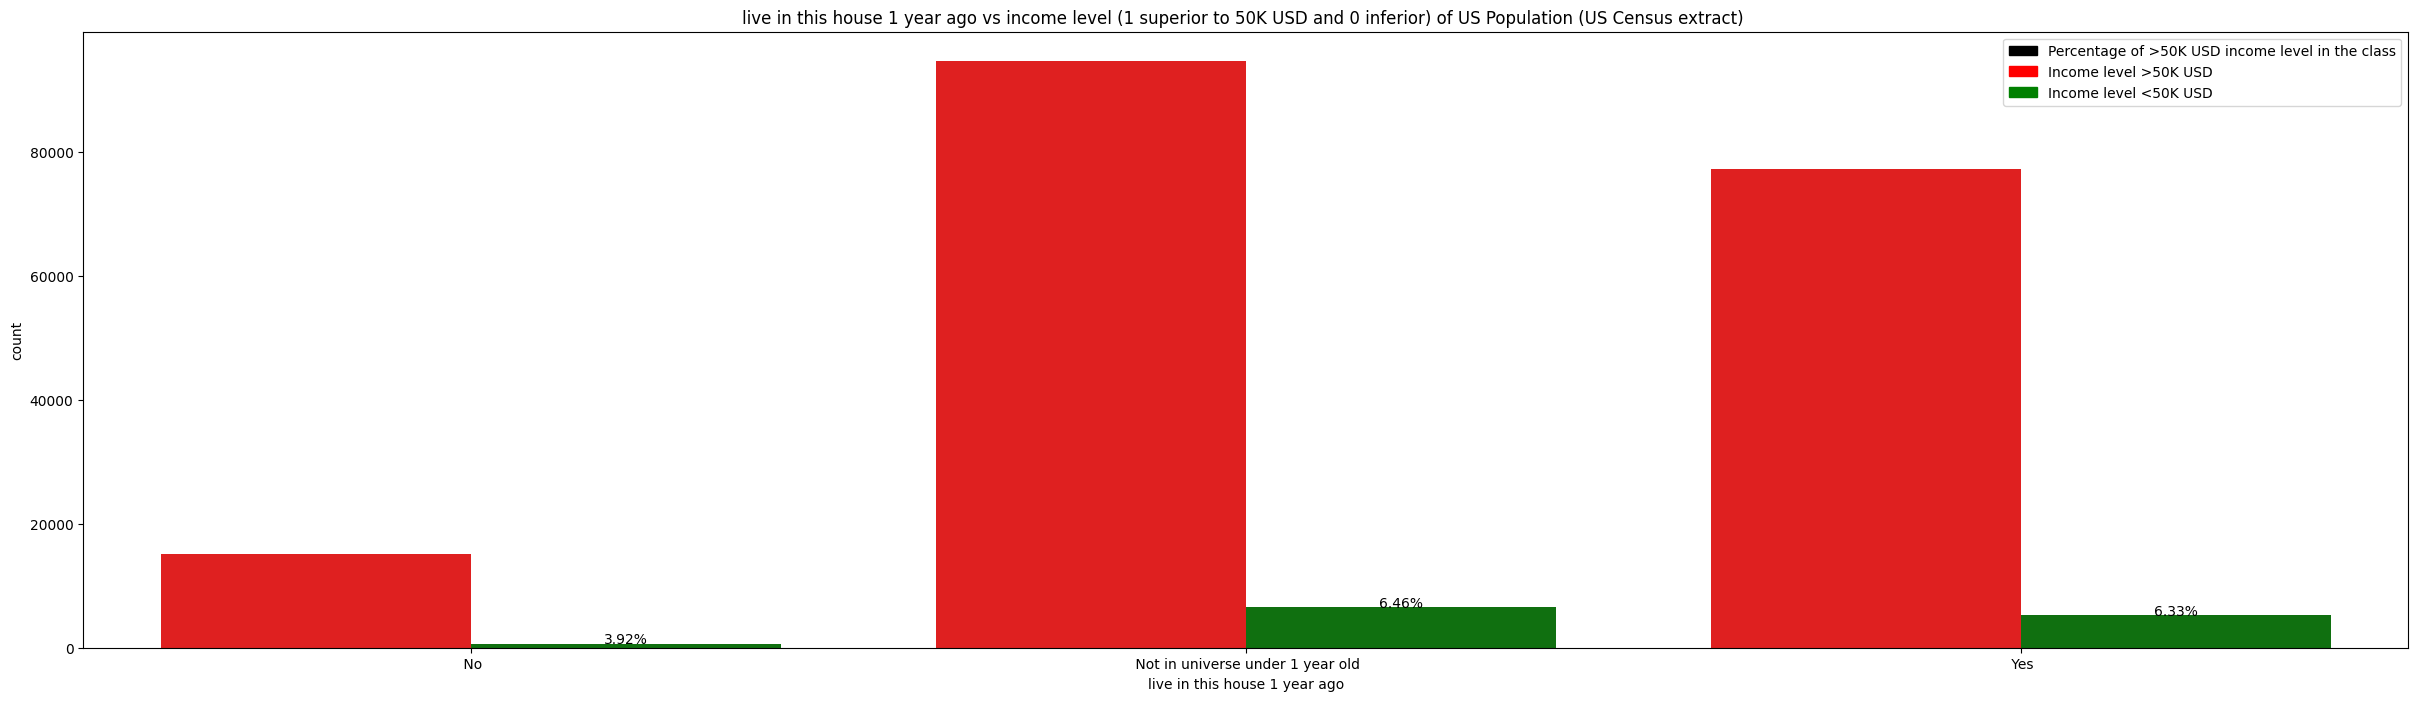

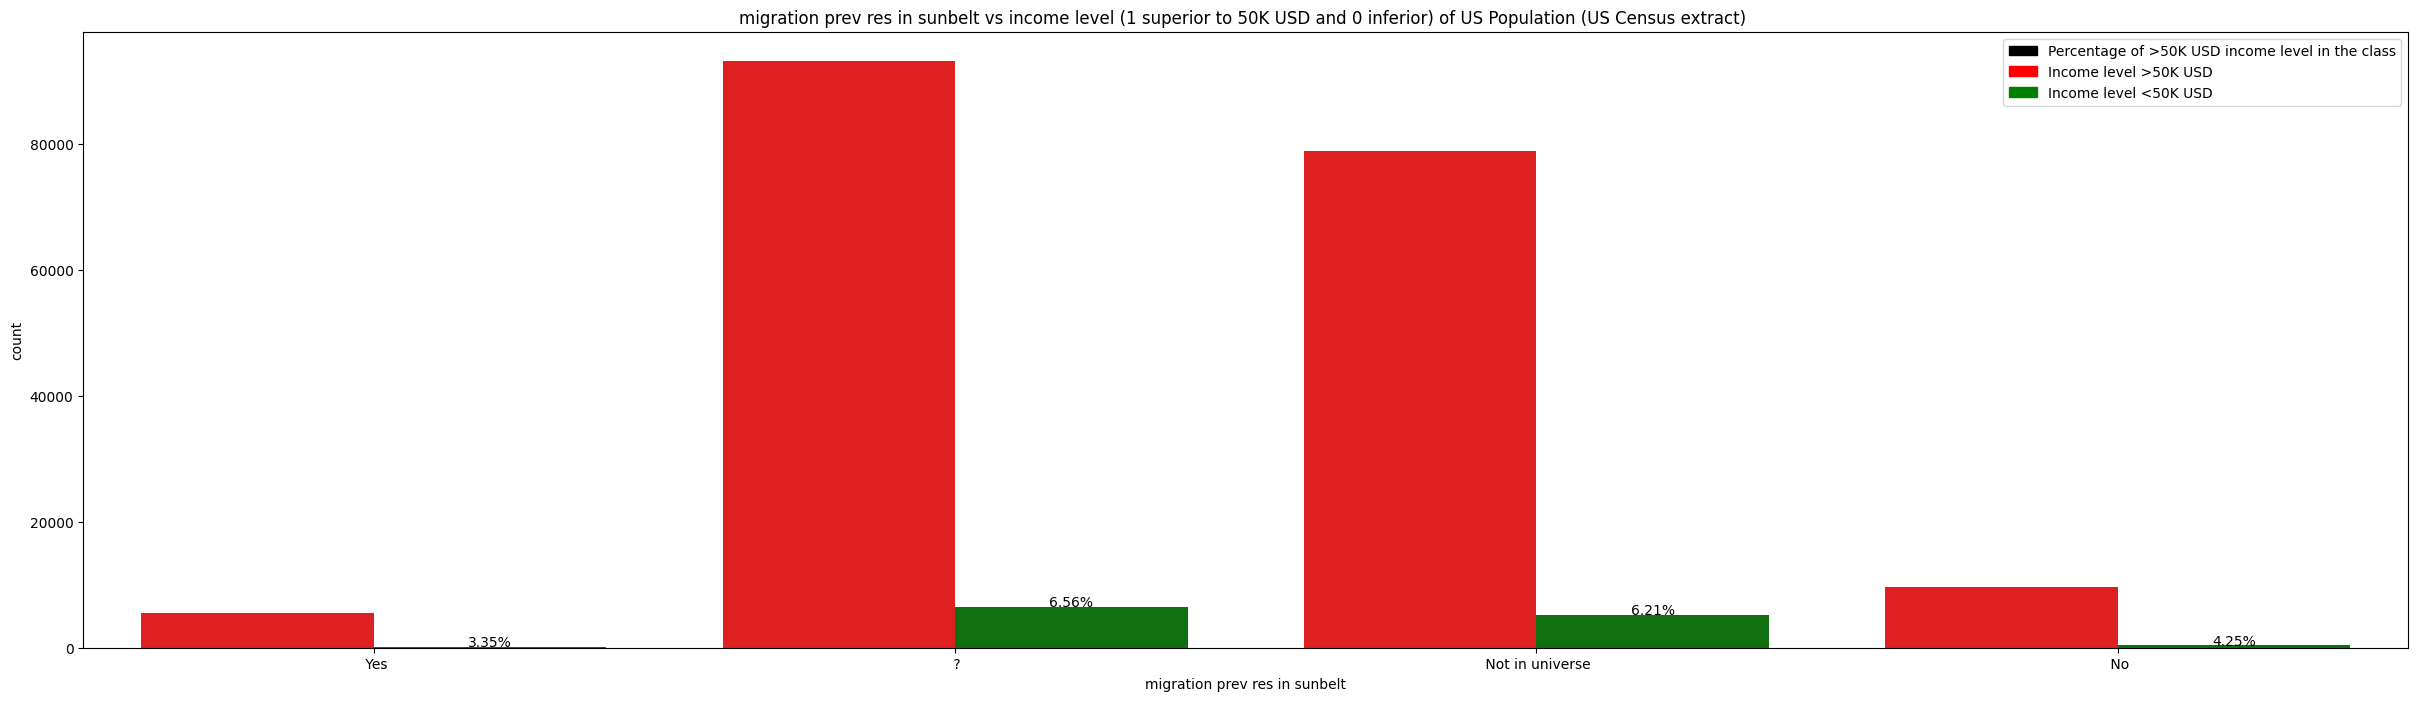

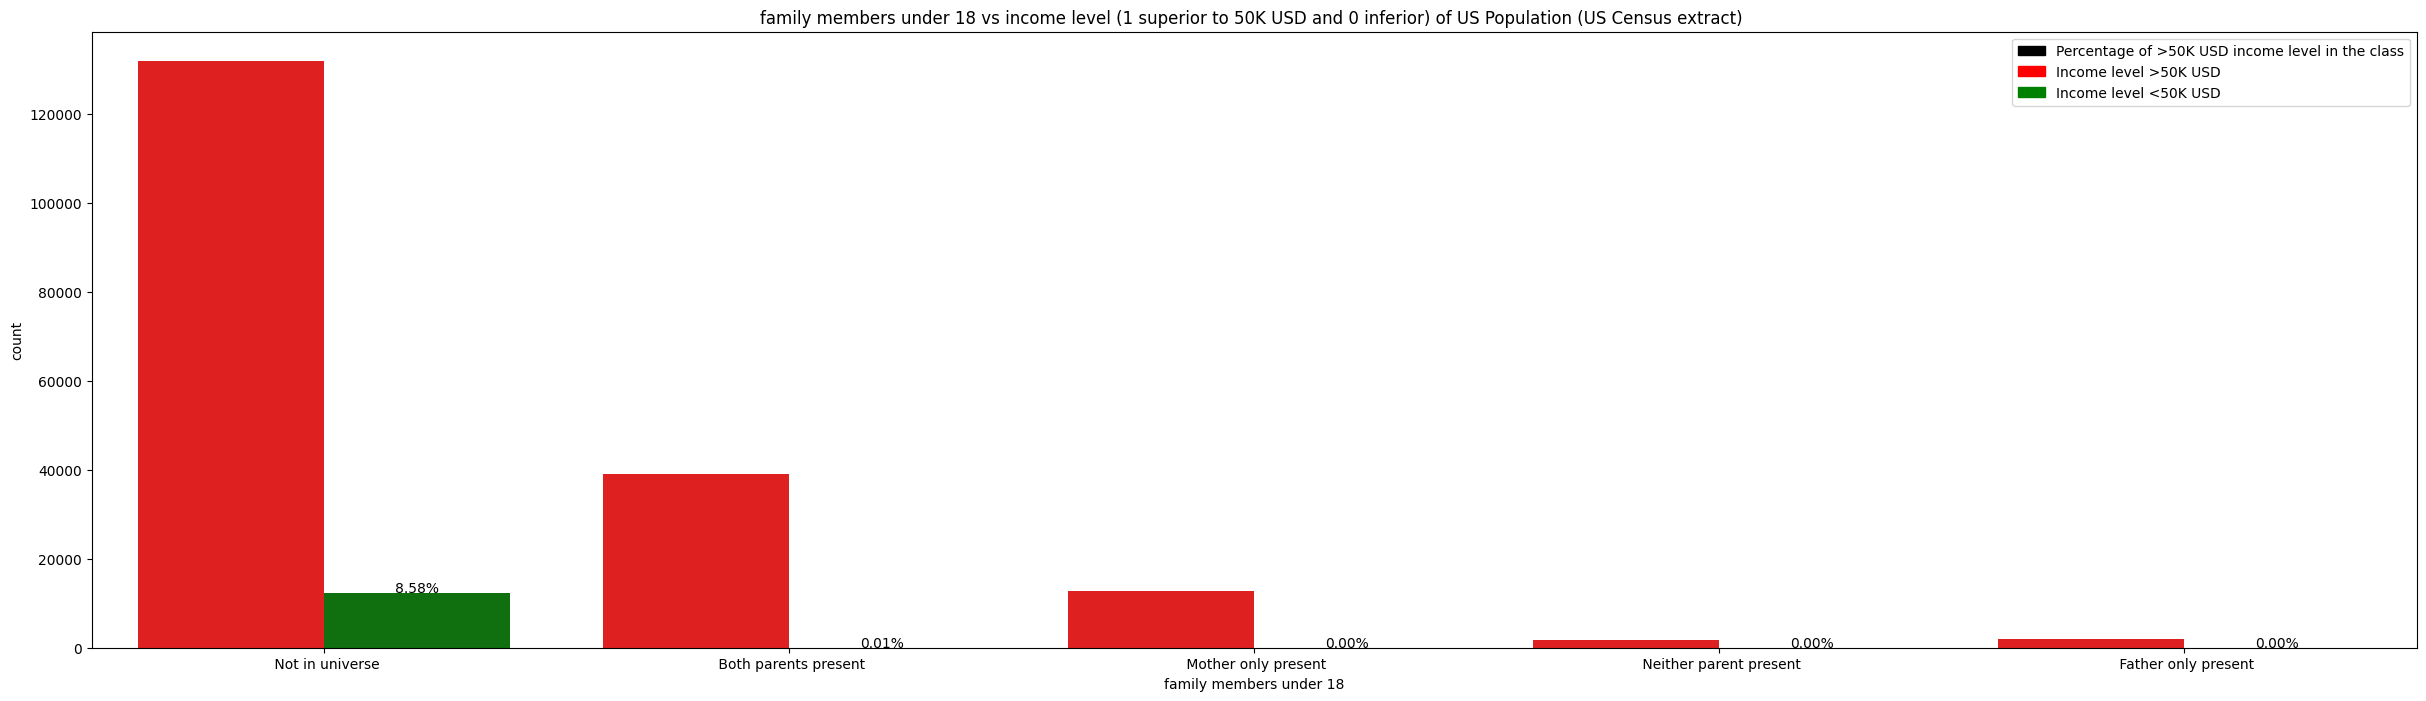

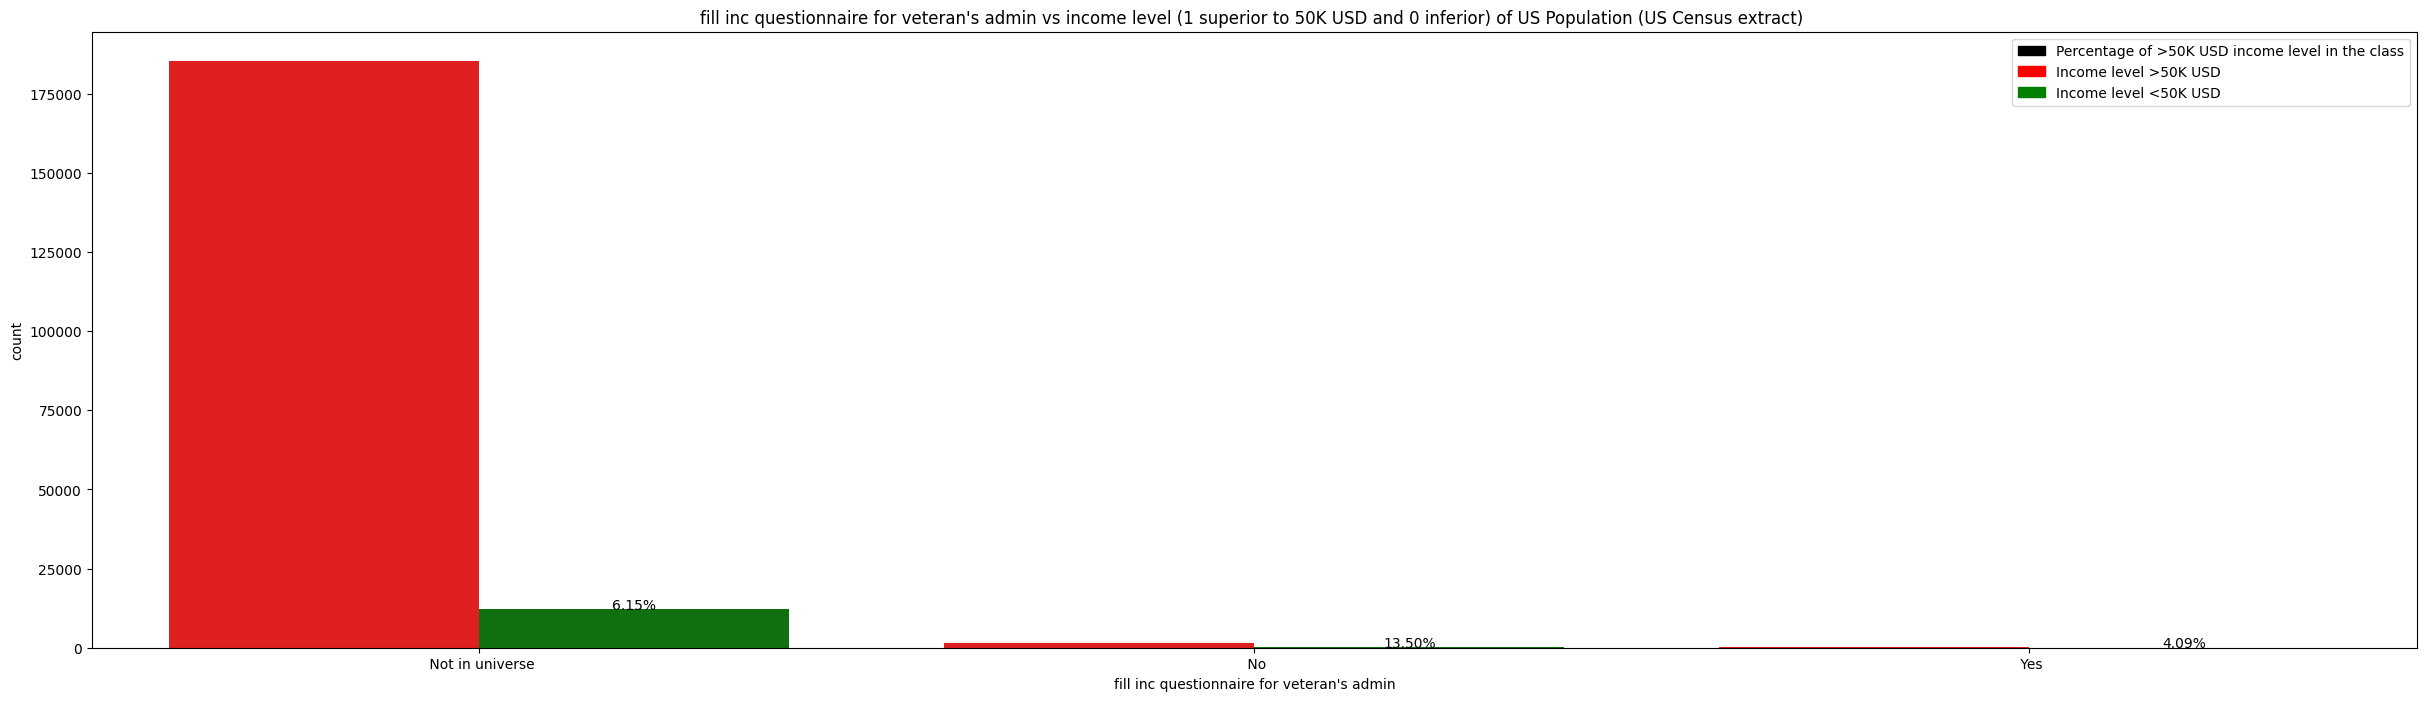

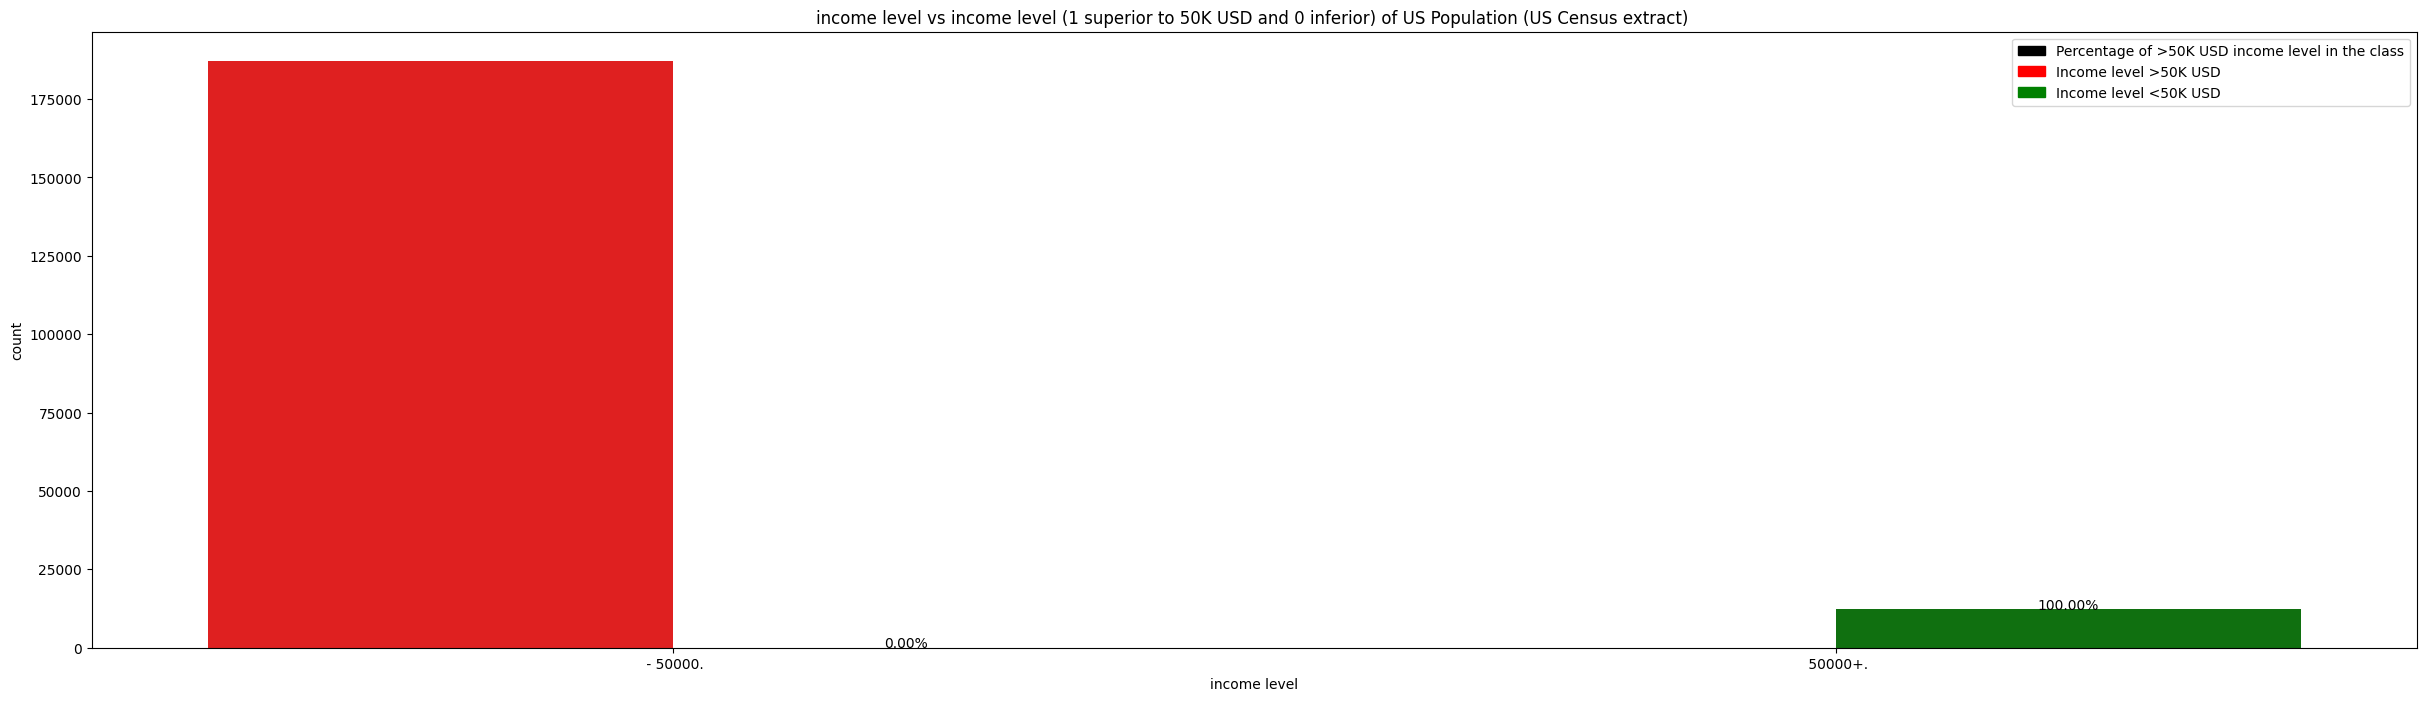

In [97]:
geo_features = ['country of birth father','country of birth mother', 'country of birth self', 'state of previous residence']
other_cat_features = [col for col in cat_cols if col not in work_cat_columns+cat_var+geo_features+['detailed household summary in household', 'detailed household and family stat']]
for column in other_cat_features:
    categorical_observation_graph(column)

### Numeric features: Looking for correlation

From the additional census information document, many codes features has been identified:
- Detailed industry recode
- Detailed occupation recode 

Therefore those features will not be part of the exploration and the model

In [100]:
exp_train_set.drop(columns=['detailed industry recode','detailed occupation recode'], inplace=True)
num_cols.remove('detailed industry recode')
num_cols.remove('detailed occupation recode')

In [101]:
corr_matrix = exp_train_set.corr()

C:\Users\valen\AppData\Local\Temp\ipykernel_5512\1204615107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = exp_train_set.corr()


<AxesSubplot: >

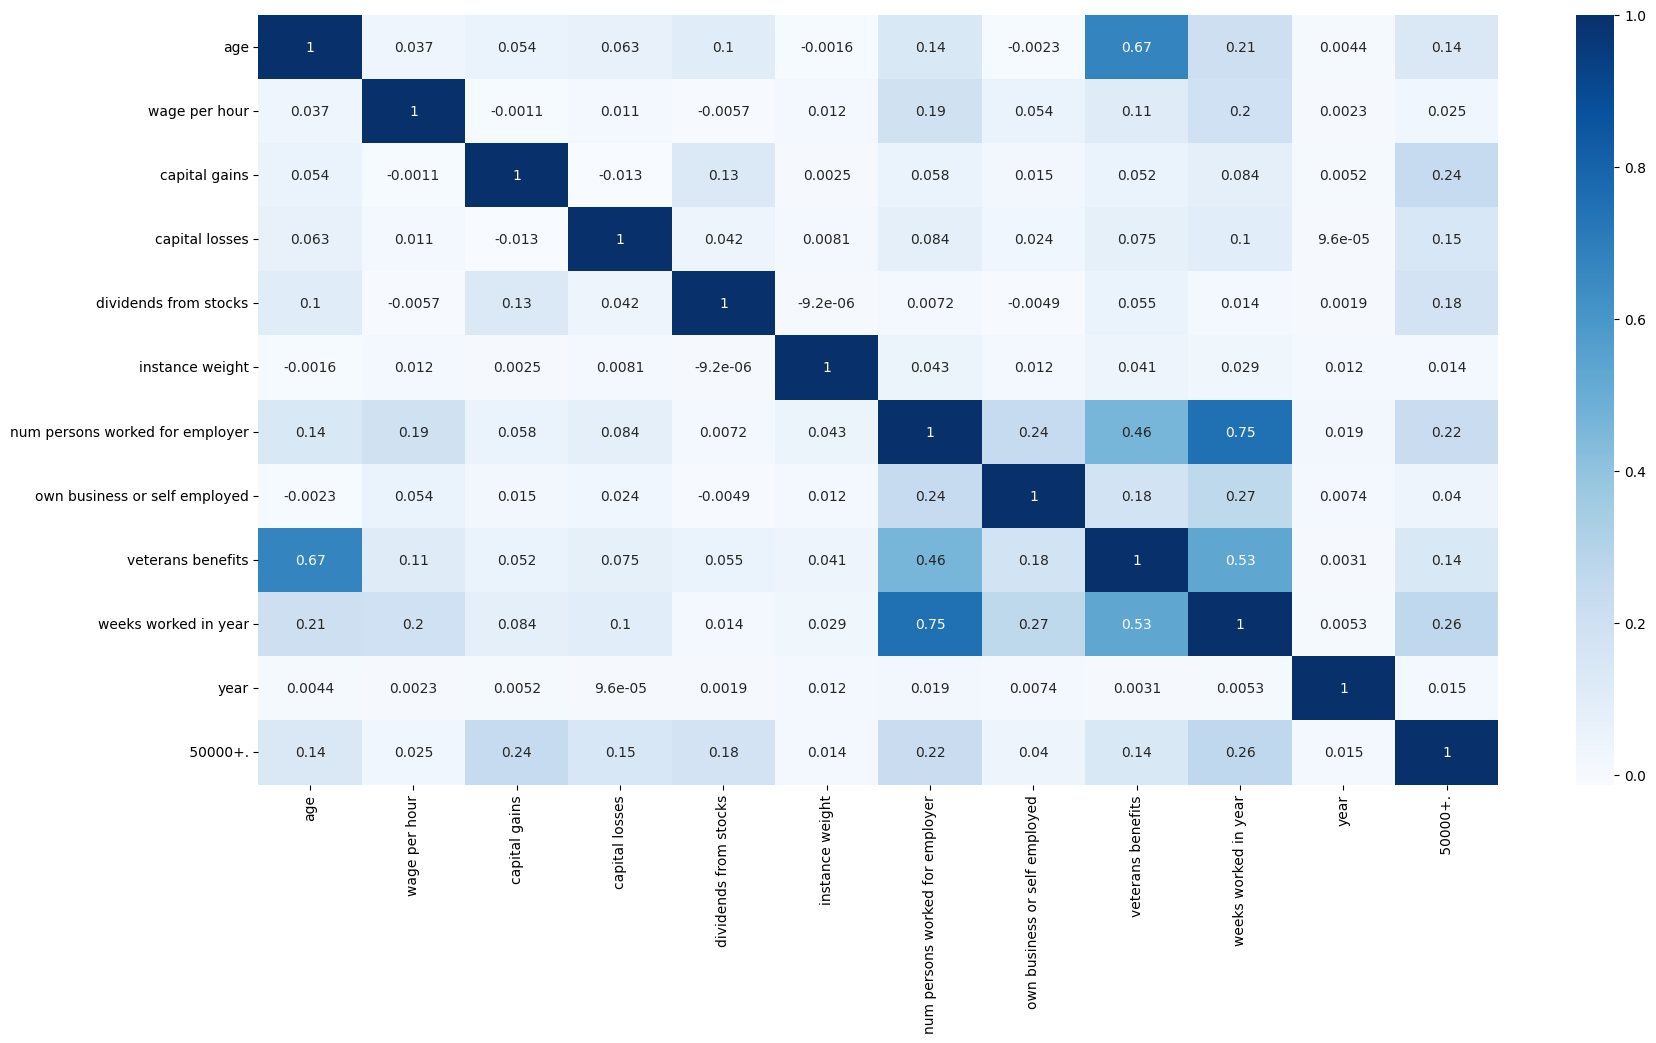

In [102]:
# plot the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,cmap="Blues",
            annot=True,
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

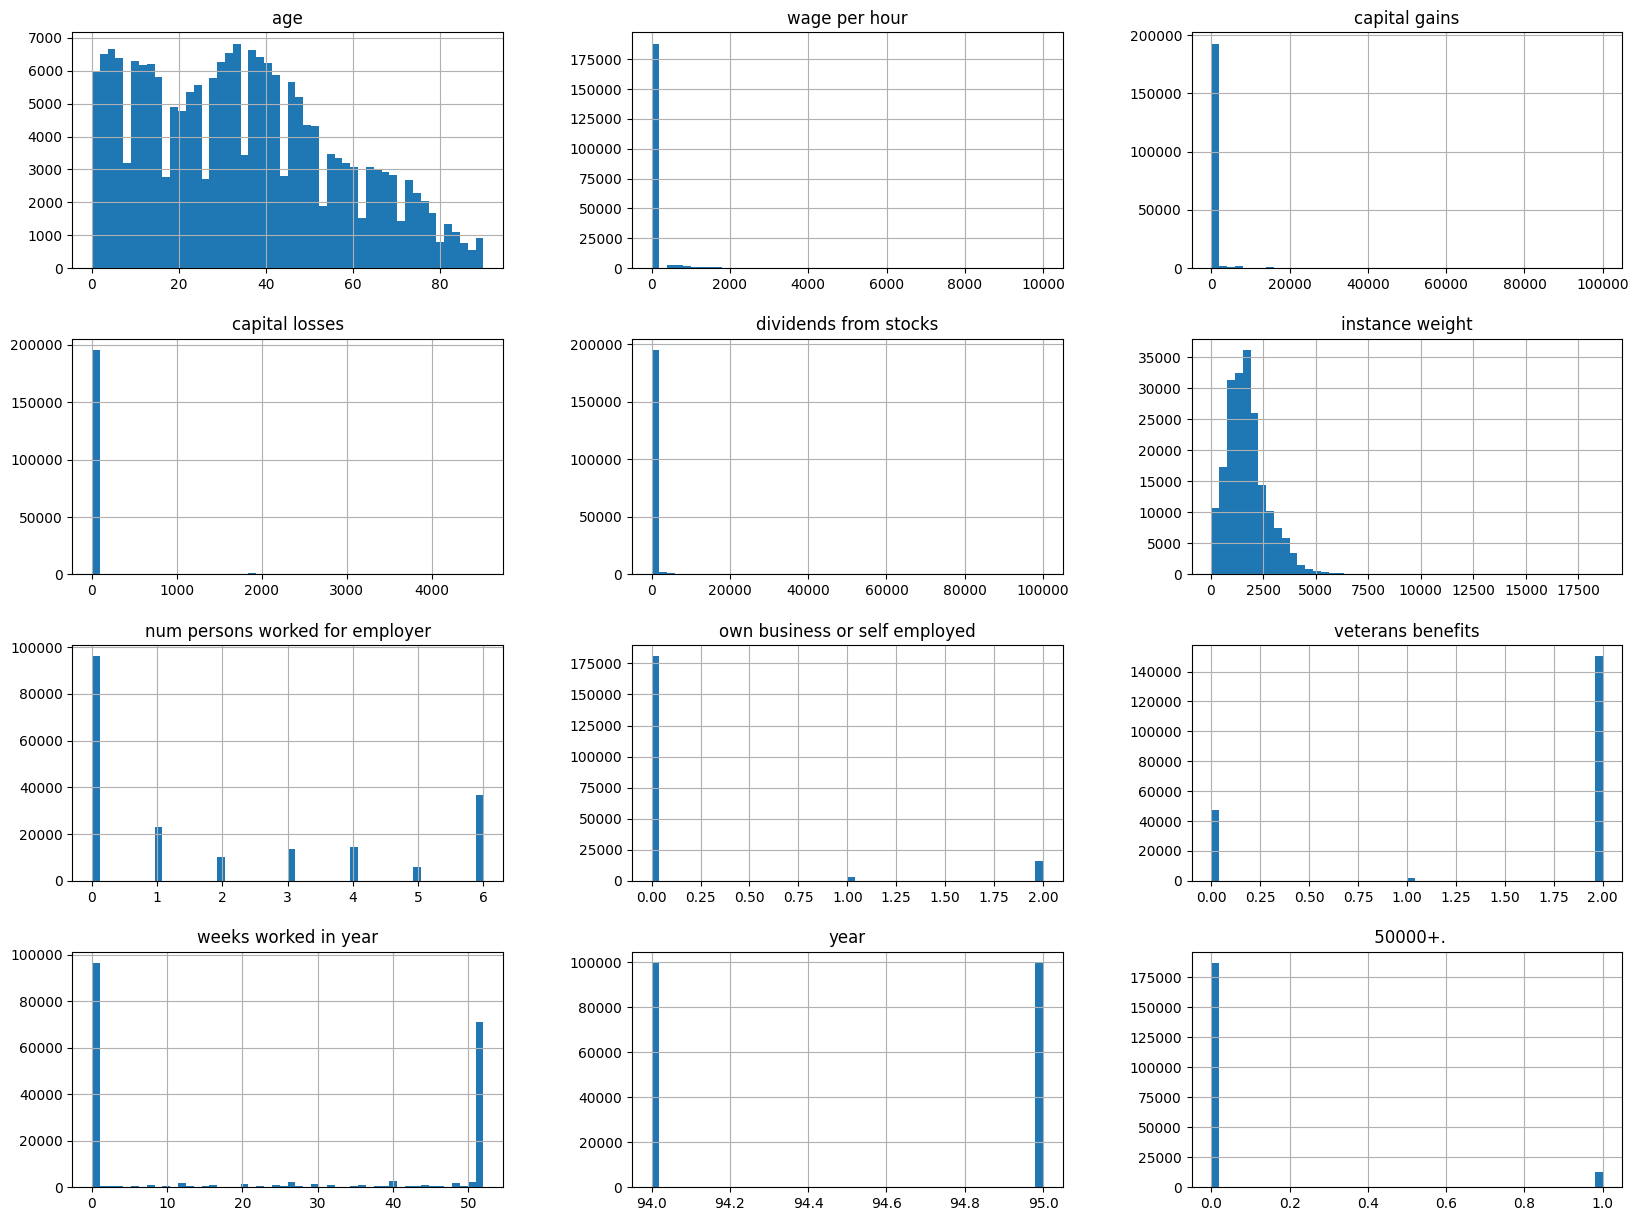

In [103]:
exp_train_set.hist(bins=50, figsize=(20,15))
plt.show()

Comments:

- The outlying values affects the visualisation of some features, adapted trandformation will be required on the exploration of the data
- These attributes have very different scales, need to apply some feature scaling (Standaradization to not be dependant on the outliers)
- Age and instance weight are tail-heavy histogram; they extend much farther to the right of the median than to the left. Harder for ML model to find patttern, need to transform these attributes in bell shaped curve

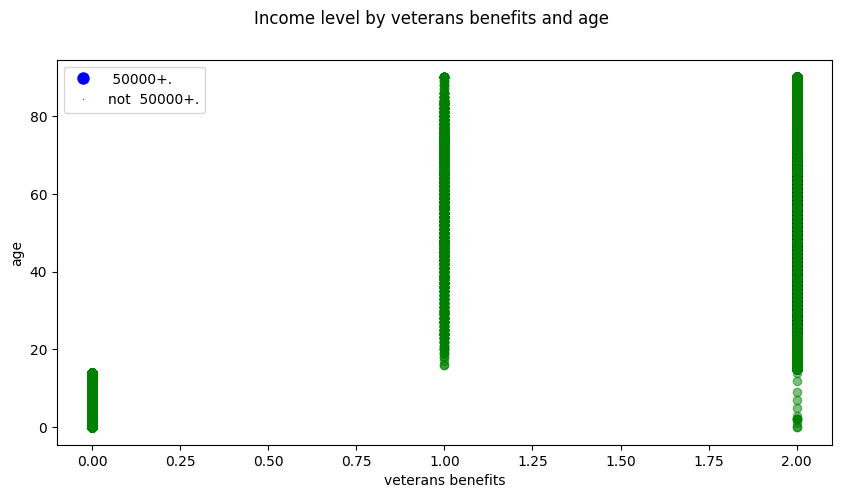

In [104]:
#Observation of the correlation between veterans benefits and age
from matplotlib.lines import Line2D   
def numeric_numeric_categorical(df,numeric1,numeric2,categorical,title):
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.scatter(df[df[categorical]==1][numeric1], df[df[categorical]==1][numeric2], c="blue", alpha=0.5)
    ax.scatter(df[df[categorical]==0][numeric1], df[df[categorical]==0][numeric2], c="green", alpha=0.5)

    ax.set_xlabel(numeric1)
    ax.set_ylabel(numeric2)

    color_patches = [
        Line2D([0], [0], marker='o', color='w', label=categorical, markerfacecolor='b', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='not {}'.format(categorical), markerfacecolor='g', markersize=2)
    ]
    ax.legend(handles=color_patches)

    fig.suptitle(title)

numeric_numeric_categorical(exp_train_set, 'veterans benefits','age',' 50000+.','Income level by veterans benefits and age')

In [105]:
def multiple_kde(df, numeric1, categorical1,title):
    fig, ax = plt.subplots()

    sns.kdeplot(df[df[categorical1]==1][numeric1], fill=True, color="blue", label=categorical1, ax=ax)
    sns.kdeplot(df[df[categorical1]==0][numeric1], fill=True, color="green", label='not {}'.format(categorical1), ax=ax)

    ax.set_xlabel(numeric1)
    ax.set_ylabel("Density")

    fig.suptitle(title) 

def multiple_hist(df, numeric1, categorical1,title):
    fig, ax = plt.subplots()

    ax.hist(df[df[categorical1]==1][numeric1], bins=15, alpha=0.5, color="blue", label=categorical1)
    ax.hist(df[df[categorical1]==0][numeric1], bins=15, alpha=0.5, color="green", label='not {}'.format(categorical1))

    ax.set_xlabel(numeric1)
    ax.set_ylabel("Count")

    fig.suptitle(title)

    ax.legend();


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
exp_train_set[num_cols] = scaler.fit_transform(exp_train_set[num_cols])

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'wage per hour'}>,
        <AxesSubplot: title={'center': 'capital gains'}>],
       [<AxesSubplot: title={'center': 'capital losses'}>,
        <AxesSubplot: title={'center': 'dividends from stocks'}>,
        <AxesSubplot: title={'center': 'instance weight'}>],
       [<AxesSubplot: title={'center': 'num persons worked for employer'}>,
        <AxesSubplot: title={'center': 'own business or self employed'}>,
        <AxesSubplot: title={'center': 'veterans benefits'}>],
       [<AxesSubplot: title={'center': 'weeks worked in year'}>,
        <AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': ' 50000+.'}>]], dtype=object)

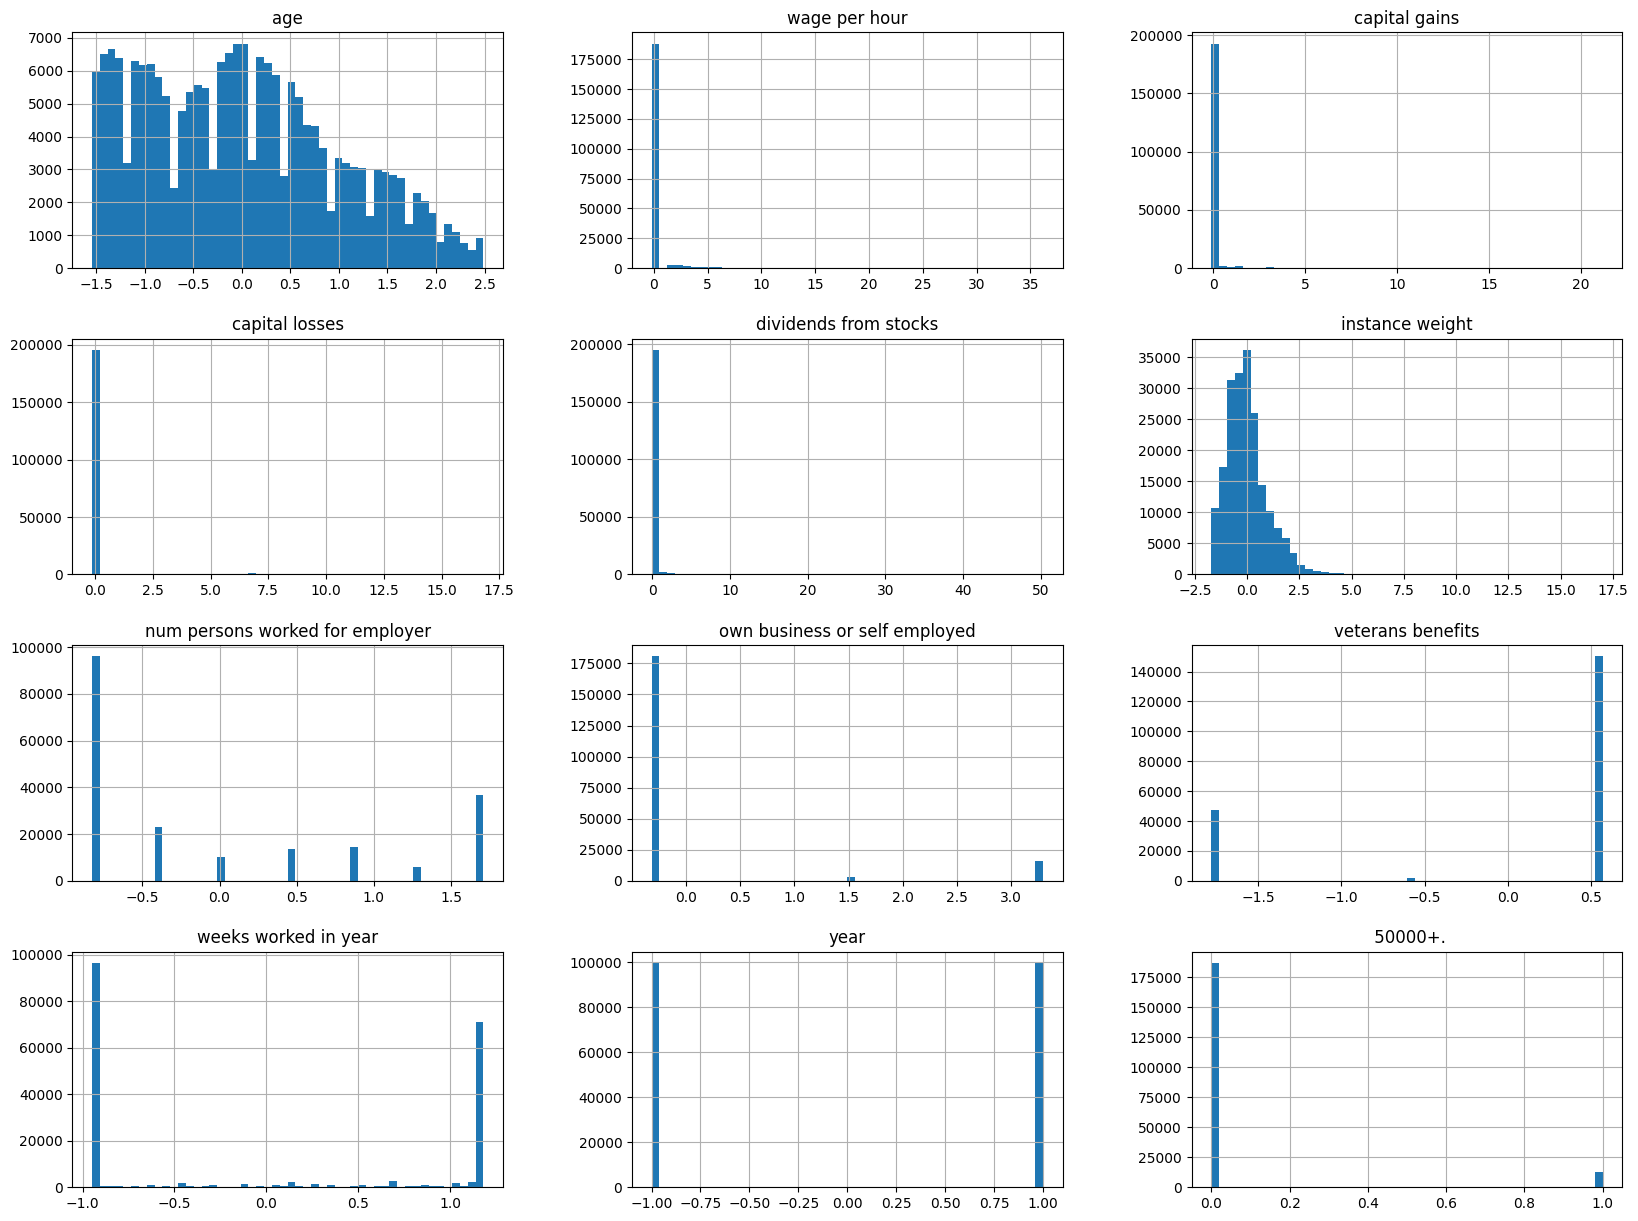

In [107]:
exp_train_set.hist(bins=50, figsize=(20,15))

### Categorical/Geo features: Visualizing Geographical data

Geographical information:
- Country of birth self (Observation of countries influence) 

In [108]:
exp_train_set['country of birth self'].unique()

array([' United-States', ' Vietnam', ' ?', ' Columbia', ' Mexico',
       ' Peru', ' Cuba', ' Philippines', ' Dominican-Republic',
       ' El-Salvador', ' Canada', ' Scotland', ' Portugal', ' Guatemala',
       ' Ecuador', ' Germany', ' Outlying-U S (Guam USVI etc)',
       ' Puerto-Rico', ' Italy', ' China', ' Poland', ' Nicaragua',
       ' Taiwan', ' England', ' Ireland', ' South Korea',
       ' Trinadad&Tobago', ' Jamaica', ' Honduras', ' Iran', ' Hungary',
       ' France', ' Cambodia', ' India', ' Hong Kong', ' Japan', ' Haiti',
       ' Holand-Netherlands', ' Greece', ' Thailand', ' Panama',
       ' Yugoslavia', ' Laos'], dtype=object)

In [109]:
exp_train_set['country of birth self'] = exp_train_set['country of birth self'].apply(lambda x: x.strip())

In [110]:
#function to convert to alpah2 country codes
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_a2_code

#Identify wrong country spelling
def country_mapping(country_name):
    if get_continent(country_name)=='Unknown':
        print('You have to modify: {}'.format(country_name))

for country in exp_train_set['country of birth self'].unique().tolist():
    country_mapping(country)


You have to modify: United-States
You have to modify: ?
You have to modify: Columbia
You have to modify: Dominican-Republic
You have to modify: El-Salvador
You have to modify: Scotland
You have to modify: Outlying-U S (Guam USVI etc)
You have to modify: Puerto-Rico
You have to modify: England
You have to modify: Trinadad&Tobago
You have to modify: Holand-Netherlands
You have to modify: Yugoslavia


In [111]:
exp_train_set['country of birth self'].replace({'United-States': 'United States of America'}, inplace=True)
exp_train_set['country of birth self'].replace({'Columbia': 'Colombia'}, inplace=True)
exp_train_set['country of birth self'].replace({'Puerto-Rico': 'Puerto Rico'}, inplace=True)
exp_train_set['country of birth self'].replace({'El-Salvador': 'El Salvador'}, inplace=True)
exp_train_set['country of birth self'].replace({'Dominican-Republic': 'Dominican Republic'}, inplace=True)
exp_train_set['country of birth self'].replace({'England': 'United Kingdom'}, inplace=True)
exp_train_set['country of birth self'].replace({'Holand-Netherlands': 'Netherlands'}, inplace=True)
exp_train_set['country of birth self'].replace({'Trinadad&Tobago': 'Trinidad and Tobago'}, inplace=True)
exp_train_set['country of birth self'].replace({'Scotland': 'United Kingdom'}, inplace=True)

In [112]:
for country in exp_train_set['country of birth self'].unique().tolist():
    country_mapping(country)

You have to modify: ?
You have to modify: Outlying-U S (Guam USVI etc)
You have to modify: Yugoslavia


In [113]:
exp_train_set['country of birth self_A2CODE'] = exp_train_set['country of birth self'].apply(lambda x: get_continent(x))

In [114]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Geolocation")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [115]:
exp_train_set['country of birth self_A2CODE'].unique()

array(['US', 'VN', 'Unknown', 'CO', 'MX', 'PE', 'CU', 'PH', 'DO', 'SV',
       'CA', 'GB', 'PT', 'GT', 'EC', 'DE', 'PR', 'IT', 'CN', 'PL', 'NI',
       'TW', 'IE', 'KR', 'TT', 'JM', 'HN', 'IR', 'HU', 'FR', 'KH', 'IN',
       'HK', 'JP', 'HT', 'NL', 'GR', 'TH', 'PA', 'LA'], dtype=object)

In [116]:
mapping_geolocation = {a2code:geolocate(a2code) for a2code in exp_train_set['country of birth self_A2CODE'].unique()}

In [117]:
mapping_geolocation['GR']=(37.983810, 23.727539)

In [118]:
exp_train_set['country of birth self_Latitude'] = exp_train_set['country of birth self_A2CODE'].apply(lambda x: mapping_geolocation[x][0])
exp_train_set['country of birth self_Longitude'] = exp_train_set['country of birth self_A2CODE'].apply(lambda x: mapping_geolocation[x][1])

In [119]:
#exp_train_set = pd.concat((exp_train_set,pd.get_dummies(exp_train_set["income level"])), axis=1)

In [120]:
exp_train_set.columns

Index(['age', 'class of worker', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'own business or self employed',
       'fill inc questionn

In [121]:
income_group_country_self = exp_train_set.groupby(['country of birth self_A2CODE','country of birth self']).agg({' 50000+.': 'mean'})

In [122]:
value_counts = exp_train_set.groupby(['country of birth self_A2CODE','country of birth self'])[' 50000+.'].size().reset_index(name='count')
income_group_country_self = pd.merge(income_group_country_self, value_counts, on=['country of birth self_A2CODE','country of birth self'])

In [123]:
income_group_country_self = income_group_country_self.reset_index()

In [124]:
income_group_country_self['country of birth self_Latitude'] = income_group_country_self['country of birth self_A2CODE'].apply(lambda x: mapping_geolocation[x][0])
income_group_country_self['country of birth self_Longitude'] = income_group_country_self['country of birth self_A2CODE'].apply(lambda x: mapping_geolocation[x][1])

In [125]:
income_group_country_self.sort_values(by=[' 50000+.'], ascending=False)

,index,country of birth self_A2CODE,country of birth self,50000+.,count,country of birth self_Latitude,country of birth self_Longitude
26,26,NL,Netherlands,0.217391,23,52.247650,5.541247
17,17,IR,Iran,0.178344,157,32.647531,54.564352
16,16,IN,India,0.174020,408,22.351115,78.667743
36,36,TW,Taiwan,0.154229,201,23.973937,120.982018
8,8,GB,United Kingdom,0.133459,532,54.702354,-3.276575
7,7,FR,France,0.123967,121,46.603354,1.888334
20,20,JP,Japan,0.117994,339,36.574844,139.239418
15,15,IE,Ireland,0.103704,135,52.865196,-7.979460
9,9,GR,Greece,0.102041,147,37.983810,23.727539
14,14,HU,Hungary,0.101266,79,47.181759,19.506094


In [130]:
# Create a world map to show distributions  
import folium
from folium.plugins import MarkerCluster
from branca.colormap import LinearColormap
from folium.map import LayerControl


def get_radius(count):
    # Map the count values to radii
    if count < 100:
        return 5
    elif count < 1000:
        return 15
    else:
        return 30
    
#empty map
color_map = LinearColormap(['red', 'green'],vmin=0, vmax=0.2)

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster(cluster_spiderfy_distance=60000).add_to(world_map)

#for each coordinate, create circlemarker of Income level
for i in range(len(income_group_country_self)):
        lat = income_group_country_self.iloc[i]['country of birth self_Latitude']
        long = income_group_country_self.iloc[i]['country of birth self_Longitude']
        count = income_group_country_self.iloc[i]['count']
        radius=get_radius(count)

        popup_text = """Country : {}<br>
                    income level >50K USD : {}<br>"""
        popup_text = popup_text.format(income_group_country_self.iloc[i]['country of birth self_A2CODE'],
                                   income_group_country_self.iloc[i][' 50000+.']
                                   )
        value = income_group_country_self.iloc[i][' 50000+.']
        color = color_map(value)
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True, color=color).add_to(marker_cluster)

# Create a LayerControl object
layer_control = LayerControl(position='topright', title='My Map', logo=False)

# Add the LayerControl object to the map in case we want to improve the map with other layer
world_map.add_child(layer_control)
        
#show the map
world_map

Interactive map of high income prevalence by country of birth

From red as the lowest proportion to green the highest proportion of >50K USD income

Count of people is represented by the size of the circle

We observe a highest proportion in the developed countries with India and Iran 

## Prepare the data

### Handling Text and categorical attributes

In [163]:
#Let s convert these categories from text to numbers 
#Identify categorical attributes having a large number o possile caategories
#cat_cols

income level:2
sex:2
enroll in edu inst last wk:3
live in this house 1 year ago:3
member of a labor union:3
fill inc questionnaire for veteran's admin:3
migration prev res in sunbelt:4
family members under 18:5
race:5
citizenship:5
reason for unemployment:6
tax filer stat:6
region of previous residence:6
marital stat:7
full or part time employment stat:8
detailed household summary in household:8
migration code-change in reg:9
class of worker:9
migration code-move within reg:10
hispanic origin:10
migration code-change in msa:10
major occupation code:15
education:17
major industry code:24
detailed household and family stat:38
country of birth father:43
country of birth mother:43
country of birth self:43
state of previous residence:51


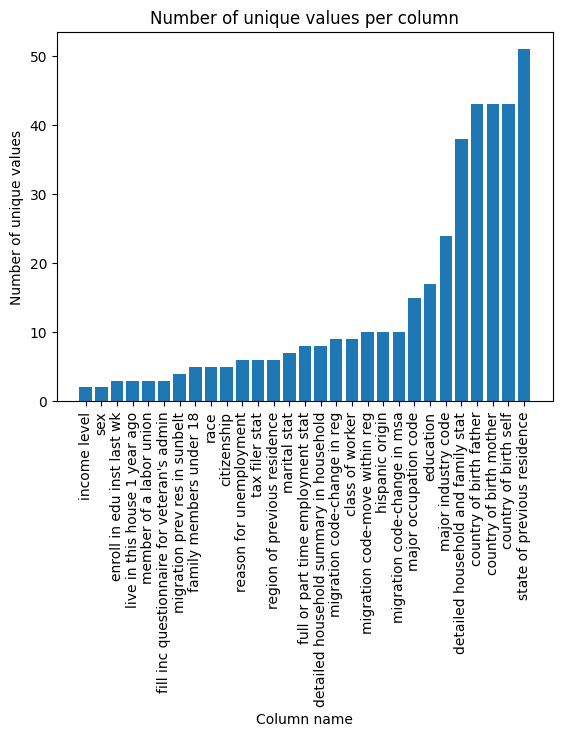

In [164]:
dict_nunique_cat_col = {col:train_set[col].nunique() for col in cat_cols}
keys = list(dict_nunique_cat_col.keys())
values = list(dict_nunique_cat_col.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
for k,v in sorted_dict.items():
    print("{}:{}".format(k,v))

# Get the keys and values from the sorted dictionary
x = list(sorted_dict.keys())
y = list(sorted_dict.values())
# Create a bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Column name')
plt.ylabel('Number of unique values')
plt.title('Number of unique values per column')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

Many categories have large number of possivle categories. This may slow down training and degrade performance.

- We will use the <i>detailed household summary in household</i> and drop the <i>detailed household and family strat</i> column as both columns are overlapping
- For the <i>major industry code</i> feature we will regroup rare values (less than 2% of the training set length) in the same category reducing the cardinality from 24 to 13
- For <i>Education</i> we will transform the feature regrouping categories into degree category following the US Educational system (Elementary, Secondary, High school, Associate degree, Bachelor degree, Master degree, PHD or advanced degree). We will order those values using an Ordinal Encoding
- For the <i>major occupation code</i> feature we will regroup rare values (less than 2% of the training set length) in the same category reducing the cardinality from 15 to 10

In [165]:
def reduce_category_thresholding(df, col, threshold_value, category_to_add):
    value_counts = df[col].value_counts()
    threshold = threshold_value * len(df[col])
    filtered_values = value_counts[value_counts < threshold]
    dict_replace = {val:category_to_add for val in filtered_values.index}
    current_dict = {v:v for v in df[col].unique()}
    new_dict = {}
    new_dict.update(current_dict)
    new_dict.update(dict_replace)
    return new_dict

In [166]:
dict_major_industry_code = reduce_category_thresholding(train_set,"major industry code",0.02,"Other professional services")
dict_major_occupation_code = reduce_category_thresholding(train_set,'major occupation code',0.02," Other service")
dict_marital_stat = reduce_category_thresholding(train_set,'marital stat',0.10,"Other")
dict_tax_filer_stat = reduce_category_thresholding(train_set,'tax filer stat',0.10,"Other")
dict_full_or_part_time_employment_stat = reduce_category_thresholding(train_set,'full or part time employment stat',0.02,"Other")

list_new_dict = [dict_major_industry_code,dict_major_occupation_code,dict_marital_stat,dict_tax_filer_stat,dict_full_or_part_time_employment_stat]


In [170]:
def transformation(df, list_new_dict=list_new_dict):
    df['major industry code'] = df['major industry code'].map(list_new_dict[0])
    df['major occupation code'] = df['major occupation code'].map(list_new_dict[1])
    df['marital stat'] = df['marital stat'].map(list_new_dict[2])
    df['tax filer stat'] = df['tax filer stat'].map(list_new_dict[3])
    df['full or part time employment stat'] = df['full or part time employment stat'].map(list_new_dict[4])
    
    #Education feature transformation
    advanced_degree_list = [' Prof school degree (MD DDS DVM LLB JD)',' Doctorate degree(PhD EdD)']
    master_degree_list = [' Masters degree(MA MS MEng MEd MSW MBA)']
    bachelor_degree_list = [' Bachelors degree(BA AB BS)']
    associate_degree_list = [' Associates degree-academic program',' Associates degree-occup /vocational']
    high_school_degree_list = [' High school graduate',' Some college but no degree']
    secondary_school_list = [' 12th grade no diploma',' 11th grade',' 10th grade',' 9th grade']
    lower_list = [' 7th and 8th grade', ' 5th or 6th grade',' 1st 2nd 3rd or 4th grade', ' Less than 1st grade']
    children = [' Children']

    dict_mapping_education = {}

    for list_, new_name in zip([advanced_degree_list,master_degree_list,bachelor_degree_list,associate_degree_list,high_school_degree_list,secondary_school_list,lower_list,children],
                     ['advanced degree', 'master degree','bachelor degree','associate degree','high school degree', 'secondary degree','lower degree','children']):

        dict_replace = {val:new_name for val in list_}
        dict_mapping_education.update(dict_replace)
    df['education'] = df['education'].map(dict_mapping_education)
    #Class of worker transformation
    df['class of worker'] = df['class of worker'].map({'Without pay': 'No Pay or never worked', 'Never worked': 'No Pay or never worked'})
    #Household summary transformation
    df['detailed household summary in household']= df['detailed household summary in household'].map({'Child 18 or older': 'Other', 
                                                                                                      'Child under 18 never married': 'Other',
                                                                                                     'Nonrelative of householder': 'Other',
                                                                                                     'Other relative of householder': 'Other',
                                                                                                     'Group Quarters- Secondary individual': 'Other',
                                                                                                     'Child under 18 ever married': 'Other'})
    return df

### Transformation pipeline

In [171]:
cat_cols.remove('income level')

ValueError: list.remove(x): x not in list

In [172]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())])

cat_onehot_attribs = ["sex","major industry code","major occupation code","marital stat","race",'class of worker','tax filer stat']
cat_ordinal_attribs = ["education"]
cat_drop_attribs = [col for col in cat_cols if col not in cat_onehot_attribs+cat_ordinal_attribs]
num_drop_attribs = ['detailed industry recode','detailed occupation recode']
num_attribs = [col for col in num_cols if col not in num_drop_attribs]

full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_onehot_attribs),
    ("cat_ord",OrdinalEncoder(),cat_ordinal_attribs),
    ("dropout_cat","drop",cat_drop_attribs),
    ("num", num_pipeline, num_attribs),
    ("dropout_num","drop",num_drop_attribs),
    
    ])



## Modelling

### Set preparation

In [173]:
def set_preparation(train_set_):
    """
    Prepares the training set for model training.
    
    This function applies transformation steps to the training set, drops the "income level" column,
    creates a dummy variable for the "income level" column, and applies a transformation pipeline to the remaining
    columns.
    
    Parameters
    ----------
    train_set_ : pd.DataFrame
        The training set to be prepared.
    
    Returns
    -------
    Tuple[np.ndarray, pd.Series]
        A tuple containing the transformed training data and the dummy variable for the "income level" column.
    """
    #Apply transformation and drop target variable of the train set
    train_set_prep = transformation(train_set_)
    train_set_prep = train_set_prep.drop("income level", axis=1)
    
    #Create target variable
    y_train = pd.get_dummies(train_set_['income level'])
    y_train = y_train[' 50000+.']
    
    #Transform all features with pipeline
    X_train = full_pipeline.fit_transform(train_set_prep)
    return X_train, y_train, full_pipeline.get_feature_names_out()


### Simple modelling

In [174]:
#Train
X_train, y_train, train_feature_names = set_preparation(train_set)

In [253]:
X_test, y_test, test_feature_names = set_preparation(df_test)

#### SGD Classifier 

Fit

In [175]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

Prediction

In [176]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

Evaluation

In [201]:
from sklearn.metrics import precision_score, recall_score
def evaluation(name, classifier, X_train_=X_train, y_train_=y_train):
    accuracy = np.mean(cross_val_score(classifier, X_train_, y_train_, cv=3))
    recall = np.mean(cross_val_score(classifier, X_train_, y_train_, cv=3, scoring='recall'))
    precision = np.mean(cross_val_score(classifier, X_train_, y_train_, cv=3, scoring='precision'))
    f1 = np.mean(cross_val_score(classifier, X_train_, y_train_, cv=3, scoring='f1'))
    result = [name, accuracy,precision,recall,f1]
    print('Accuracy: ',result[1])
    print('Precision: ',result[2])
    print('Recall: ',result[3])
    print('F1: ',result[4])
    return result

In [202]:
eval_simple_sgd = evaluation('SGD Classifier trained on imbalanced set',sgd_clf, X_train, y_train)

Accuracy:  0.9452240942280796
Precision:  0.79416556809774
Recall:  0.1614463882205104
F1:  0.26559970495552054


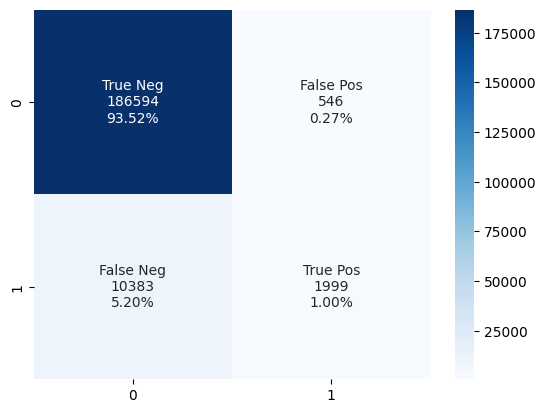

In [179]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train, y_train_pred)
def confusion_matrix_plot(cf_matrix):
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
confusion_matrix_plot(cf_matrix)

In [254]:
test_eval_simple_sgd = evaluation('SGD Classifier trained on imbalanced set',sgd_clf, X_test, y_test)

Accuracy:  0.9458205175417002
Precision:  0.8006492954412611
Recall:  0.17038473973488522
F1:  0.2797446419708995


#### Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [181]:
y_pred_rf = rnd_clf.predict(X_train)

In [203]:
simple_rnd_eval = evaluation('Random forest trained on imbalanced set',rnd_clf, X_train, y_train)

Accuracy:  0.945574924769144
Precision:  0.8917464867996038
Recall:  0.14472665433844933
F1:  0.240818221285414


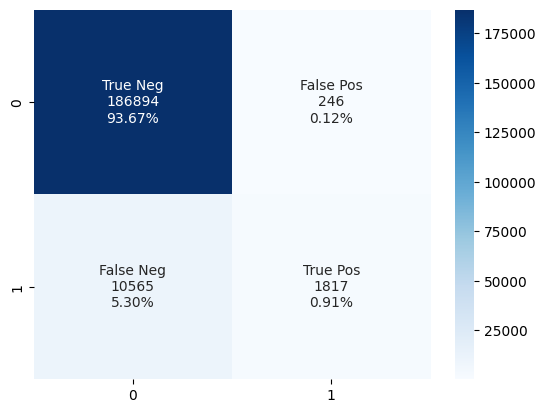

In [183]:
cf_matrix = confusion_matrix(y_train, y_pred_rf)
confusion_matrix_plot(cf_matrix)

In [255]:
test_simple_rnd_eval = evaluation('Random forest trained on imbalanced set',rnd_clf, X_test, y_test)

Accuracy:  0.9451388762898617
Precision:  0.8811177964777919
Recall:  0.13498221791141288
F1:  0.2342657923458784


### Resampling of the dataset to resolve imbalanced challenge

#### By Oversampling minority class

In [261]:
import random

def balance_dataset(data, target_variable):
  """Balances a dataset by oversampling minority classes.
  
  Args:
    data: The original dataset as a Pandas dataframe.
    target_variable: The name of the target variable in the dataset.
  
  Returns:
    A new dataset with an equal number of samples for each target value.
  """
  target_counts = data[target_variable].value_counts()
  min_count = target_counts.min()
  
  balanced_data = pd.DataFrame()
  
  for target_value in target_counts.index:
    # Select all samples with this target value
    target_value_samples = data[data[target_variable] == target_value]
    
    # Oversample the minority class to have the same number of samples as the majority class
    oversampled_samples = target_value_samples.sample(min_count, replace=True)
    
    # Append the oversampled samples to the balanced data
    balanced_data = balanced_data.append(oversampled_samples)
  
  return balanced_data

In [262]:
oversampling_train_set = balance_dataset(train_set_intact,'income level')

C:\Users\valen\AppData\Local\Temp\ipykernel_5144\1194556778.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(oversampled_samples)
C:\Users\valen\AppData\Local\Temp\ipykernel_5144\1194556778.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(oversampled_samples)


<AxesSubplot: xlabel='income level', ylabel='count'>

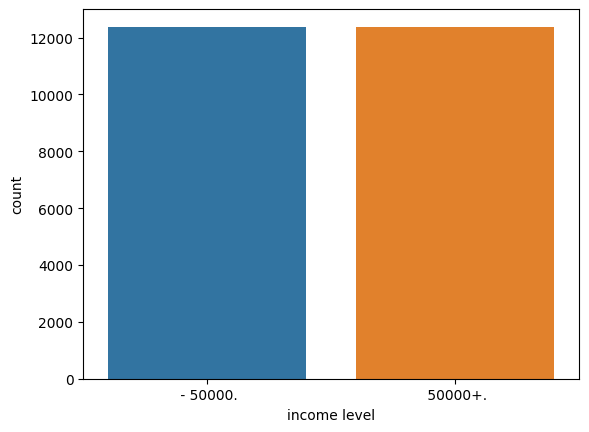

In [263]:
sns.countplot(x=oversampling_train_set["income level"])

In [264]:
X_train_over, y_train_over, over_feature_names = set_preparation(oversampling_train_set)

In [265]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_over, y_train_over)

SGDClassifier(random_state=42)

Prediction

In [274]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

Evaluation

In [275]:
cross_val_score(sgd_clf, X_train, y_train, cv=3)

array([0.94301437, 0.94654698, 0.94611094])

In [276]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[186640,    500],
       [ 10429,   1953]], dtype=int64)

In [277]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.7961679576029351

In [278]:
recall_score(y_train, y_train_pred)

0.1577289613955742

Evaluation on the imbalanced validation set 

##### Random Forest

In [544]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train_over, y_train_over)
y_pred_rf = rnd_clf.predict(X_train_over)

In [545]:
confusion_matrix(y_train_over, y_pred_rf)

array([[6922, 1803],
       [ 823, 7902]], dtype=int64)

In [546]:
y_valid_pred = rnd_clf.predict(X_valid)

In [547]:
confusion_matrix(y_valid, y_valid_pred)

array([[33073, 23127],
       [  133,  3524]], dtype=int64)

In [548]:
precision_score(y_valid, y_valid_pred)

0.13222768376421148

In [549]:
recall_score(y_valid, y_valid_pred)

0.9636313918512441

#### By undersampling majority class

In [184]:
dict_results = {}

In [185]:
import random

def underbalance_dataset(data, target_variable, minority_ratio):
  """Underbalances a dataset by undersampling the majority class.
  
  Args:
    data: The original dataset as a Pandas dataframe.
    target_variable: The name of the target variable in the dataset.
    minority_ratio: The desired ratio of minority class samples to majority class samples.
  
  Returns:
    A new dataset with the specified ratio of minority class samples to majority class samples.
  """
  target_counts = data[target_variable].value_counts()
  max_count = target_counts.max()
  min_count = int(max_count * minority_ratio)
  
  underbalanced_data = pd.DataFrame()
  
  for target_value in target_counts.index:
    # Select all samples with this target value
    target_value_samples = data[data[target_variable] == target_value]
    
    if target_value_samples.shape[0] == max_count:
      # Undersample the majority class to have the specified number of samples
      undersampled_samples = target_value_samples.sample(min_count, replace=False)
    else:
      # Do not undersample the minority class
      undersampled_samples = target_value_samples
    
    # Append the undersampled samples to the underbalanced data
    underbalanced_data = underbalanced_data.append(undersampled_samples)
  
  return underbalanced_data


In [186]:
underbalance_train_set = underbalance_dataset(train_set_intact,'income level', 0.4)

C:\Users\valen\AppData\Local\Temp\ipykernel_5512\1741881613.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  underbalanced_data = underbalanced_data.append(undersampled_samples)
C:\Users\valen\AppData\Local\Temp\ipykernel_5512\1741881613.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  underbalanced_data = underbalanced_data.append(undersampled_samples)


<AxesSubplot: xlabel='income level', ylabel='count'>

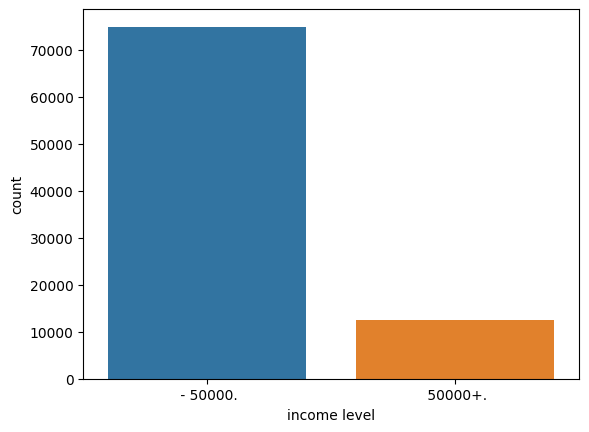

In [187]:
sns.countplot(x=underbalance_train_set["income level"])

In [188]:
X_train_under, y_train_under, under_feature_names = set_preparation(underbalance_train_set)

##### SGD Classifier

In [189]:
sgd_clf_under = SGDClassifier(random_state=53)
sgd_clf_under.fit(X_train_under, y_train_under)

SGDClassifier(random_state=53)

Prediction

In [190]:
y_train_pred_under = cross_val_predict(sgd_clf_under, X_train, y_train, cv=3)

In [204]:
eval_under_sgd = evaluation('SGD Classifier trained on 0.4 balanced set',sgd_clf_under, X_train, y_train)

Accuracy:  0.9462415193837729
Precision:  0.803637677390331
Recall:  0.18624103793697397
F1:  0.2971993970452545


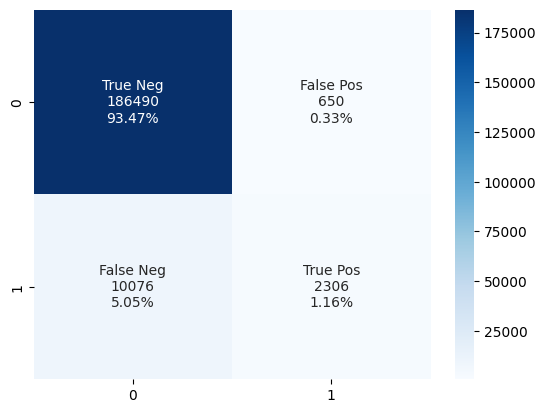

In [192]:
cf_matrix = confusion_matrix(y_train, y_train_pred_under)
confusion_matrix_plot(cf_matrix)

In [257]:
test_eval_under_sgd = evaluation('SGD Classifier trained on 0.4 balanced set',sgd_clf_under, X_test, y_test)

Accuracy:  0.94599092370983
Precision:  0.7708692870664753
Recall:  0.1946330423537019
F1:  0.3032891249881904


##### Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf_under = RandomForestClassifier(n_estimators=300, max_leaf_nodes=16, n_jobs=-1)
rnd_clf_under.fit(X_train_under, y_train_under)
y_pred_rf = cross_val_predict(rnd_clf_under, X_train, y_train, cv=3)

In [205]:
eval_under_rnd_clf = evaluation('Random forest trained on 0.4 balanced set',rnd_clf_under, X_train, y_train)

Accuracy:  0.945594972256624
Precision:  0.8861601733242607
Recall:  0.14609915856316477
F1:  0.23864450609418694


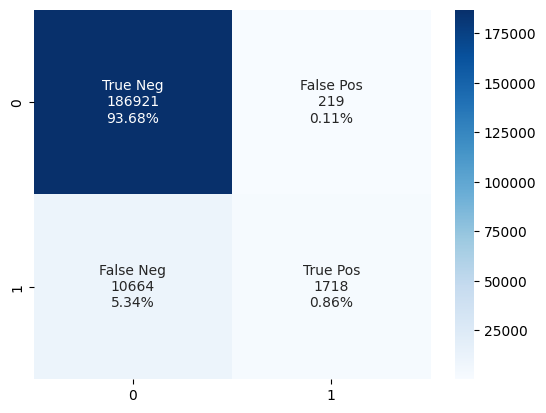

In [195]:
cf_matrix = confusion_matrix(y_train, y_pred_rf)
confusion_matrix_plot(cf_matrix)

#### Fine-tuning

In [196]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'max_leaf_nodes': [16, 18, 20], 'n_estimators': [300, 500, 700]}
]
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rnd_clf_under, param_grid = param_grid, cv=3,
return_train_score=True)
grid_search.fit(X_train_under, y_train_under)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_leaf_nodes=16,
                                              n_estimators=300, n_jobs=-1),
             param_grid=[{'max_leaf_nodes': [16, 18, 20],
                          'n_estimators': [300, 500, 700]}],
             return_train_score=True)

In [197]:
grid_search.best_params_

{'max_leaf_nodes': 20, 'n_estimators': 300}

#### Feature importance of Random forest

In [198]:
# Get the feature names and scores
feature_names = under_feature_names
scores = rnd_clf_under.feature_importances_

# Zip the feature names and scores together and sort by score in reverse order
sorted_scores = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)

# Iterate over the sorted list and print the feature name and score
for name, score in sorted_scores:
    print(name, score)


num__dividends from stocks 0.15613242488067033
num__capital gains 0.11483522811824547
num__weeks worked in year 0.10725714354499805
cat_ord__education 0.09854283220812105
cat__sex_ Male 0.06112196188286211
cat__major occupation code_ Executive admin and managerial 0.06101475244084899
cat__sex_ Female 0.05724870790533766
num__age 0.04921719158713441
num__num persons worked for employer 0.04672730054863159
cat__major occupation code_ Professional specialty 0.04306375813148367
cat__major occupation code_ Not in universe 0.04001158821579212
cat__major industry code_ Not in universe or children 0.03719752549739093
cat__tax filer stat_ Joint both under 65 0.03058645761357298
cat__tax filer stat_ Nonfiler 0.021680227267729255
cat__marital stat_ Married-civilian spouse present 0.019732610147460174
cat__marital stat_ Never married 0.014573338151412202
num__capital losses 0.014173586516234848
cat__major occupation code_ Adm support including clerical 0.005404888790782166
cat__tax filer stat_ Sin

In [256]:
test_eval_under_rnd_clf = evaluation('Random forest trained on 0.4 balanced set',rnd_clf_under, X_test, y_test)

Accuracy:  0.9451088059252931
Precision:  0.8836700238265777
Recall:  0.13191076624636278
F1:  0.23849306025996286


## Conclusion

### Model assessment 

Training set

In [249]:
lst = [eval_under_rnd_clf, eval_under_sgd, eval_simple_sgd, simple_rnd_eval]
df_final_eval = pd.DataFrame(lst, columns =['Name','Accuracy', 'Precision', 'Recall', 'F1'])

In [250]:
df_final_eval

,Name,Accuracy,Precision,Recall,F1
0,Random forest trained on 0.4 balanced set,0.945595,0.886160,0.146099,0.238645
1,SGD Classifier trained on 0.4 balanced set,0.946242,0.803638,0.186241,0.297199
2,SGD Classifier trained on imbalanced set,0.945224,0.794166,0.161446,0.265600
3,Random forest trained on imbalanced set,0.945575,0.891746,0.144727,0.240818


Testing set

In [258]:
lst_test = [test_eval_under_rnd_clf, test_eval_under_sgd, test_eval_simple_sgd, test_simple_rnd_eval]
df_final_eval_test = pd.DataFrame(lst_test, columns =['Name','Accuracy', 'Precision', 'Recall', 'F1'])

In [259]:
df_final_eval_test

,Name,Accuracy,Precision,Recall,F1
0,Random forest trained on 0.4 balanced set,0.945109,0.883670,0.131911,0.238493
1,SGD Classifier trained on 0.4 balanced set,0.945991,0.770869,0.194633,0.303289
2,SGD Classifier trained on imbalanced set,0.945821,0.800649,0.170385,0.279745
3,Random forest trained on imbalanced set,0.945139,0.881118,0.134982,0.234266


The SGD Classifier trained on 0.4 balanced seems to be the best model according to the F1 Score, let's plot the ROC curve to assess the models

### Feature importance

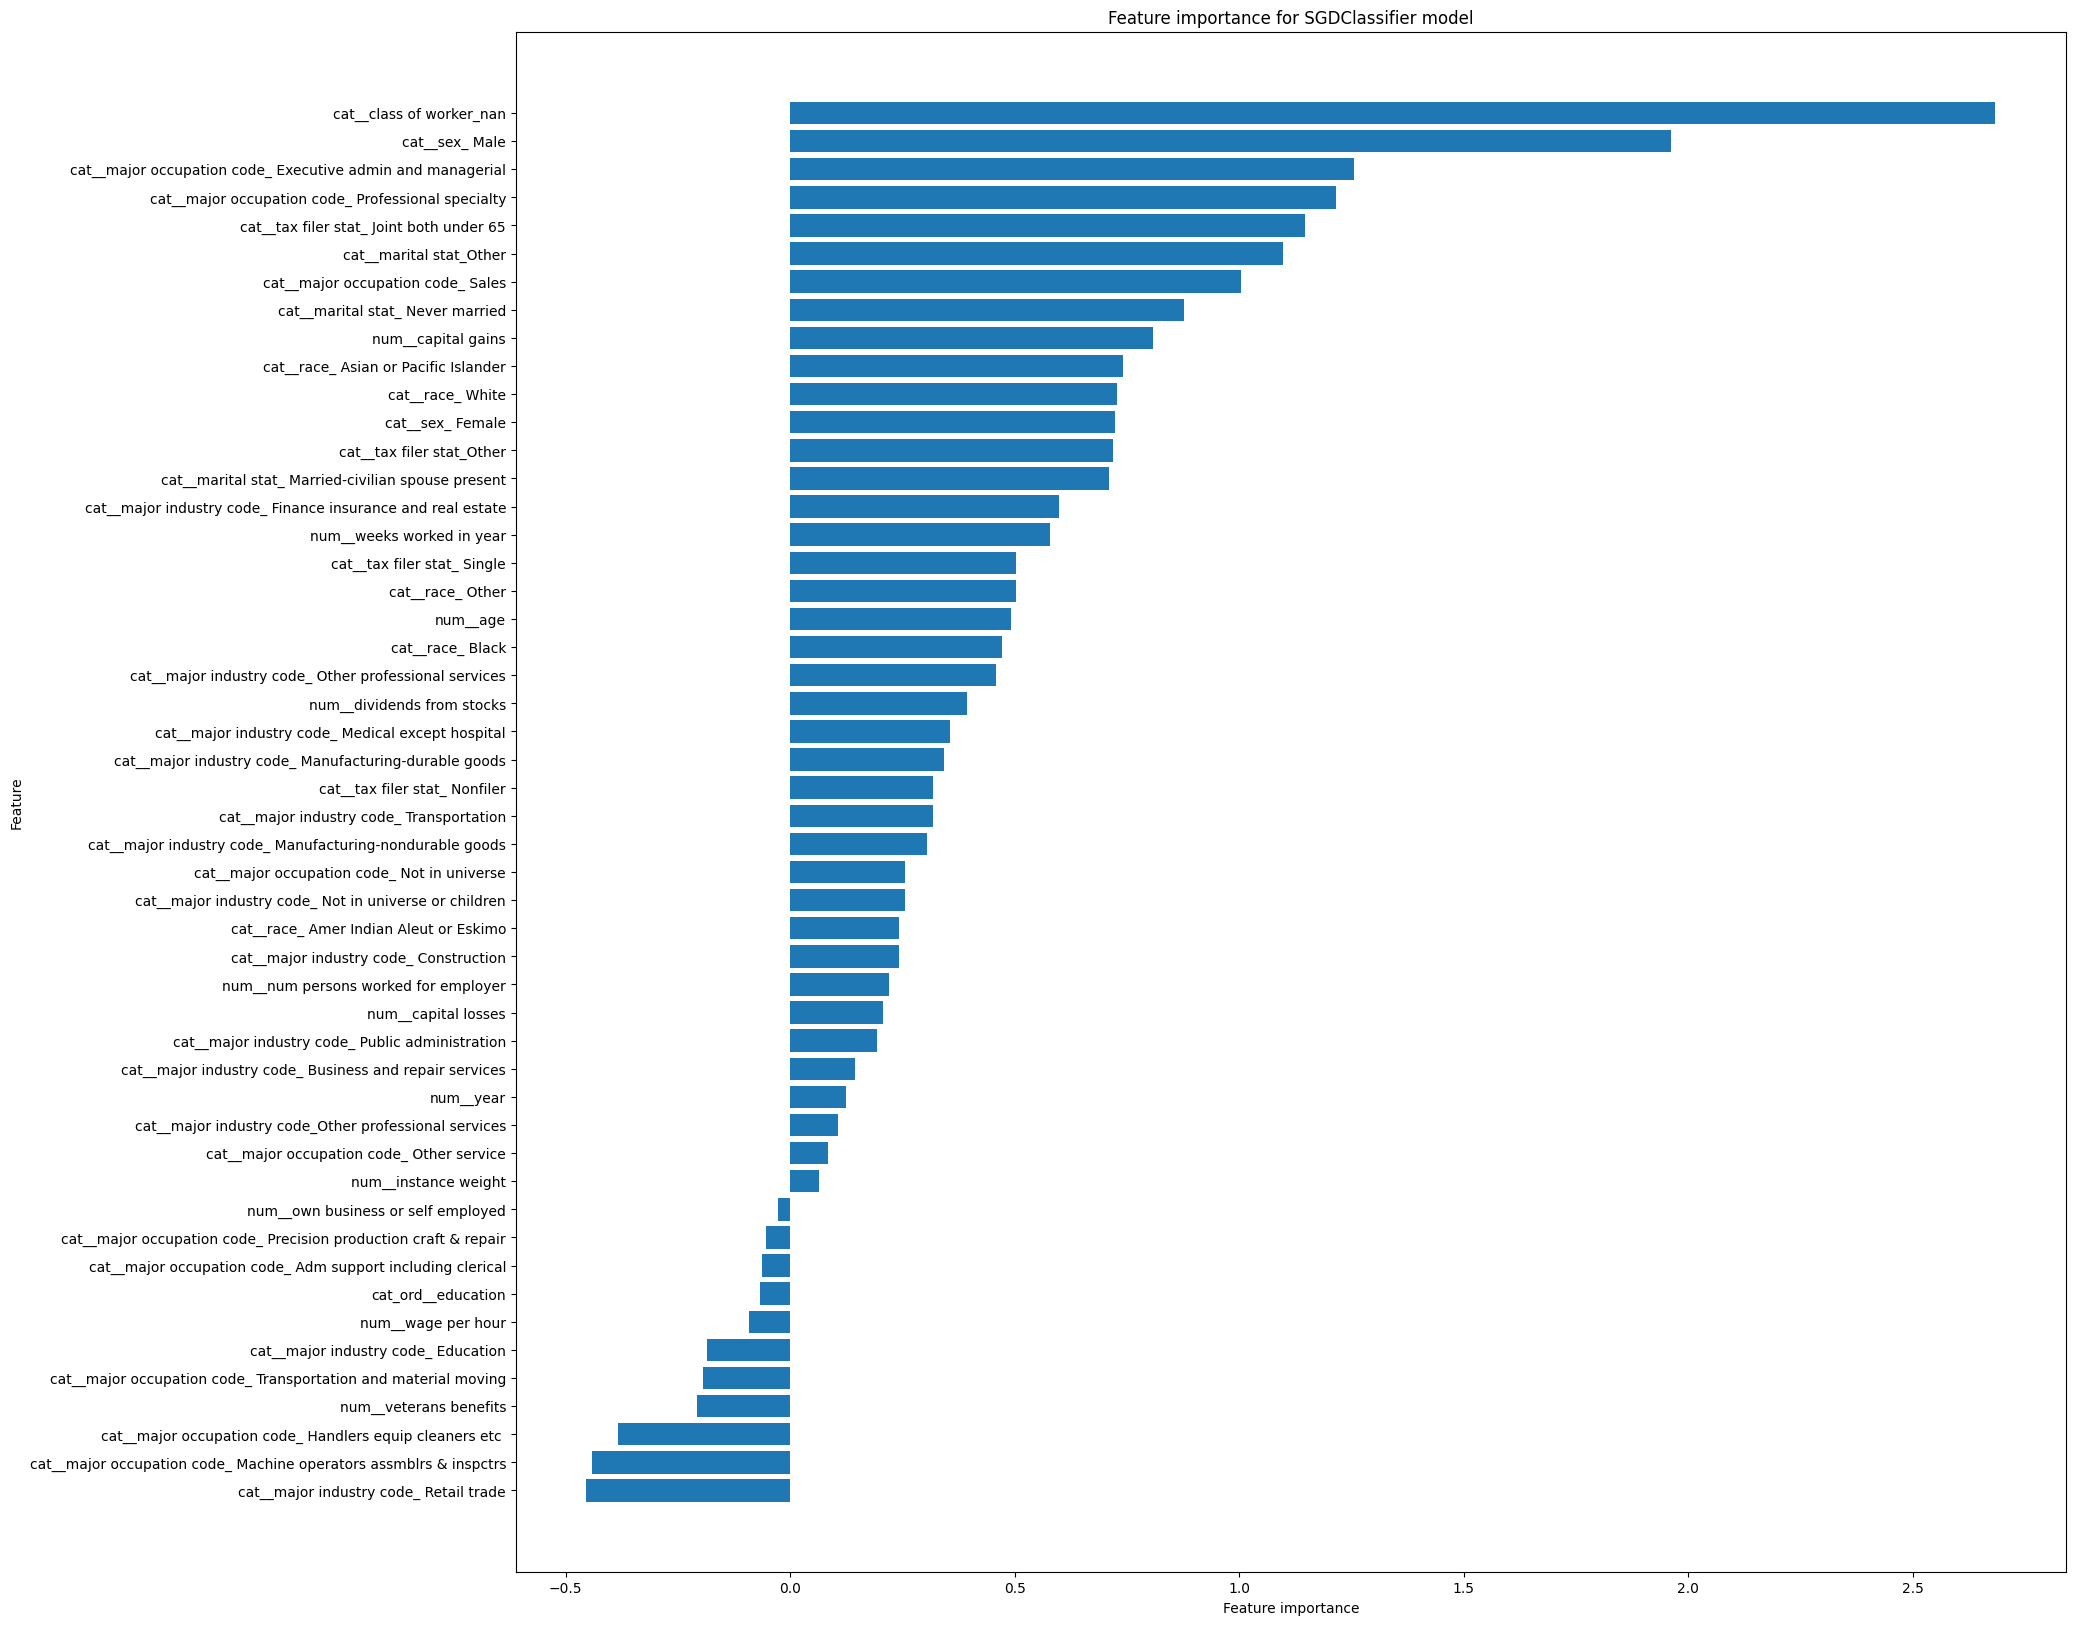

In [261]:
# Get the feature importance from the model
feature_importance = sgd_clf_under.coef_

# Get the feature names from the data
feature_names = train_feature_names

# Sort the feature importance values in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Get the sorted feature names
sorted_feature_names = [feature_names[i] for i in sorted_idx]
plt.figure(figsize=(20, 20))
# Plot the feature importance values
plt.barh(sorted_feature_names[0], feature_importance[0][sorted_idx][0])

# Add labels and title
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importance for SGDClassifier model')

# Show the plot
plt.show()